In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast
import math
from wordcloud import WordCloud,STOPWORDS
from collections import OrderedDict, Counter
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

train_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/train.csv'
test_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/test.csv'
#train_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/train.csv'
#test_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/test.csv'

def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

dataset = pd.read_csv(train_path, **io_params)
dataset.info()
print(dataset.describe())
dataset.head()
x_labels = ['belongs_to_collection', 'budget', 'genres','homepage','imdb_id','original_language','original_title','overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
y_labels =['revenue']
x_train, x_test, y_train, y_test = train_test_split(dataset[x_labels], dataset[y_labels], test_size=0.20, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   3000 non-null   object 
 11  production_countries   3000 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       3000 non-null   object 
 15  stat

In [2]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 643 to 861
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  2400 non-null   int64
dtypes: int64(1)
memory usage: 37.5 KB


REVENUE

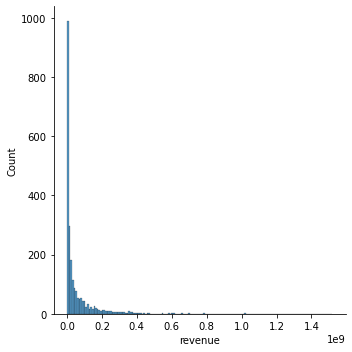

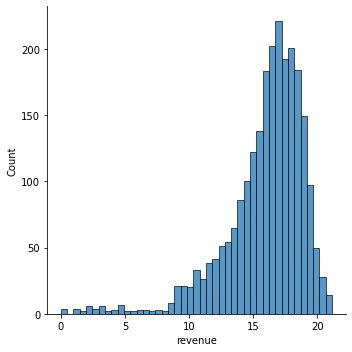

In [3]:
sns.displot(y_train.revenue)
sns.displot(np.log(y_train.revenue))

In [4]:
for i, e in enumerate(y_train['revenue']):
    if(e < 1000):
        print(i, e)

55 3
179 1
211 18
416 70
437 25
523 20
536 923
660 1
732 306
738 4
806 46
854 6
881 88
981 198
987 1
1006 671
1027 3
1188 30
1233 18
1257 30
1301 85
1313 204
1344 10
1381 12
1401 8
1410 15
1427 60
1506 25
1511 8
1533 1
1543 500
1583 3
1599 404
1656 10
1740 126
1803 641
1865 79
1871 100
1925 97
1970 11
1980 311
2047 5
2097 8
2114 23
2131 100
2216 125
2231 422
2381 32


In [5]:
x_train['logRevenue'] = y_train['revenue'].apply(lambda x: np.log(x))
dataset['logRevenue'] = dataset['revenue'].apply(lambda x: np.log(x))

BELONGS TO COLLECTION

In [6]:
for i, e in enumerate(x_train['belongs_to_collection'][:5]):
    print(i, e)

0 []
1 []
2 []
3 []
4 []


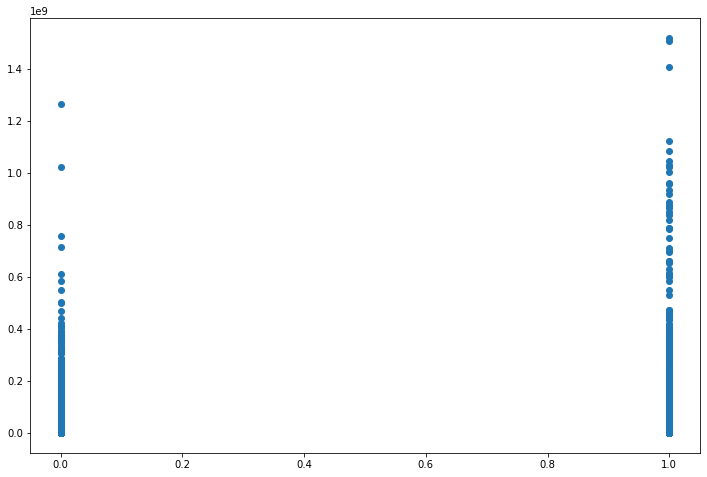

In [7]:
x_train['has_collection'] = x_train['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
sum(x_train['has_collection'])

plt.figure(figsize=(12,8))
plt.scatter(x_train['has_collection'], y_train['revenue'])
plt.show()

In [8]:
dataset['has_collection'] = dataset['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
dataset = dataset.drop(['belongs_to_collection'], axis=1)

BUDGET

In [9]:
for i, e in enumerate(x_train['budget']):
    if e <=1e5:
        print(i, e)

3 0
12 0
18 0
20 0
32 0
38 0
51 24554
52 0
55 0
59 0
61 0
71 0
74 0
76 0
80 0
83 0
85 0
86 0
87 0
88 0
89 0
90 0
94 0
95 0
100 0
102 0
109 0
110 0
113 0
115 0
117 0
120 0
122 0
126 0
127 0
128 0
133 0
138 0
141 0
145 0
150 0
151 0
153 0
154 0
157 0
159 0
160 0
162 0
163 0
164 0
166 0
167 0
169 0
170 0
173 0
178 0
179 12
180 0
184 0
185 0
190 0
192 0
198 0
201 0
202 0
209 0
218 0
219 0
220 0
221 0
229 0
232 0
233 0
234 0
241 0
243 0
254 0
257 0
261 0
265 0
267 0
271 60000
276 0
277 0
283 0
286 0
292 0
297 0
298 0
305 0
308 0
309 0
312 0
317 0
318 0
319 0
322 0
328 0
329 0
331 0
332 0
340 0
343 0
344 0
348 0
353 0
356 0
362 0
369 0
378 0
381 0
382 0
383 0
384 0
386 0
389 0
392 0
398 0
402 0
404 0
408 0
410 0
412 0
414 0
416 0
417 0
419 0
420 0
428 0
429 0
434 0
435 0
437 4
440 0
450 0
456 0
457 0
458 0
465 0
466 0
467 0
468 0
471 0
473 0
475 0
476 0
480 0
481 0
487 0
490 0
493 0
494 0
497 0
498 0
499 0
500 0
502 0
505 0
508 0
509 0
511 0
513 25000
515 0
517 0
523 0
524 0
525 0
533 0
534 

In [10]:
x_train['isBudgetDirty'] = x_train['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =x_train[x_train['budget'] >= 1e5]['budget'].mean()
mean_budget

30854833.02696366

In [11]:
x_train.loc[x_train.budget < 1e5, 'budget'] = mean_budget

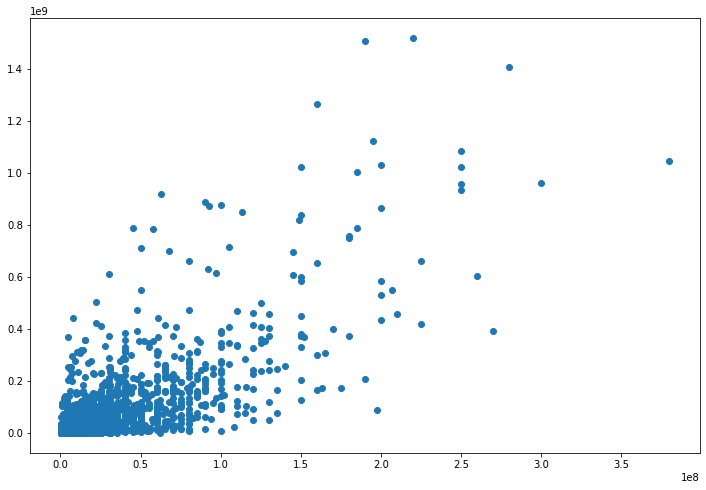

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['budget'], y_train['revenue'])
plt.show()

In [13]:
dataset['isBudgetDirty'] = dataset['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =dataset[dataset['budget'] >= 1e5]['budget'].mean()
mean_budget
dataset.loc[dataset.budget < 1e5, 'budget'] = mean_budget

GENRES

In [14]:
for i, e in enumerate(x_train['genres'][:5]):
    for gen in e:
        print(gen['name'])

Comedy
Romance
Horror
Comedy
Music
Fantasy
Thriller
Action
Crime
Drama
Romance
Thriller
Comedy


In [15]:
x_train['list_of_genres'] = x_train['genres'].apply(lambda x: [gen['name'] for gen in x])
x_train['genre_count'] = x_train['list_of_genres'].apply(lambda x: len(x))
x_train = x_train.drop(['genres'], axis=1)
x_train = x_train.drop(['list_of_genres'], axis=1)
x_train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,tagline,title,Keywords,cast,crew,logRevenue,has_collection,isBudgetDirty,genre_count
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,NaN,tt0094898,en,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,"[{'id': 3015, 'name': 'fast food restaurant'},...","[{'cast_id': 1, 'character': 'Prince Akeem / C...","[{'credit_id': '52fe450fc3a36847f80ba1d3', 'de...",19.481080,0,0,2
701,[],2.500000e+07,NaN,tt0091419,en,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'name': 'The Geffen Company', 'id': 2956}, {...",...,Released,Don't feed the plants.,Little Shop of Horrors,"[{'id': 2382, 'name': 'flower'}, {'id': 2642, ...","[{'cast_id': 8, 'character': 'Seymour Krelborn...","[{'credit_id': '52fe43b59251416c7501b029', 'de...",17.472600,0,0,3
227,[],5.000000e+07,http://www.driveangry3d.com/,tt1502404,en,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'name': 'Summit Entertainment', 'id': 491}, ...",...,Released,One hell of a ride.,Drive Angry,"[{'id': 4479, 'name': 'bone'}, {'id': 41019, '...","[{'cast_id': 4, 'character': 'Milton', 'credit...","[{'credit_id': '54e07d43c3a368454d0053e5', 'de...",17.180438,0,0,4
1698,[],3.085483e+07,NaN,tt0105391,en,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,Released,He needed to trust her with his secret. She ha...,Shining Through,"[{'id': 74, 'name': 'germany'}, {'id': 818, 'n...","[{'cast_id': 2, 'character': 'Ed Leland', 'cre...","[{'credit_id': '58fd30ef925141643c02713f', 'de...",16.889176,0,1,3
1011,[],3.500000e+07,NaN,tt3152624,en,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,Released,We All Know One.,Trainwreck,"[{'id': 567, 'name': 'alcohol'}, {'id': 2864, ...","[{'cast_id': 4, 'character': 'Amy Townsend', '...","[{'credit_id': '55aa7f0c92514172ef003b26', 'de...",18.762821,0,0,1


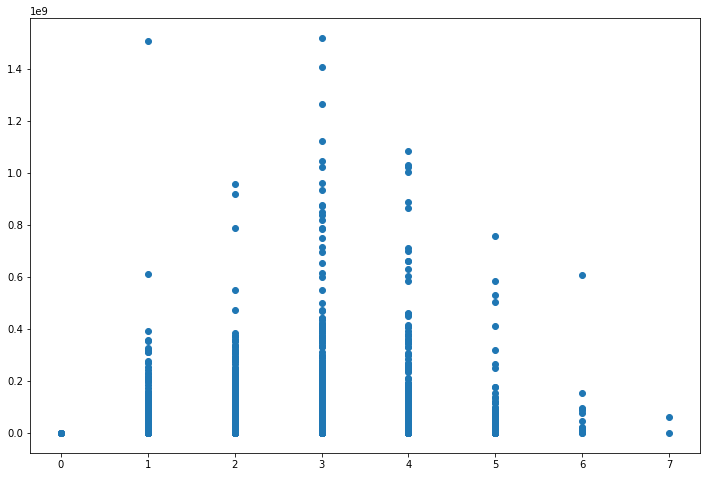

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['genre_count'], y_train['revenue'])
plt.show()

In [17]:
dataset['list_of_genres'] = dataset['genres'].apply(lambda x: [gen['name'] for gen in x])
dataset['genre_count'] = dataset['list_of_genres'].apply(lambda x: len(x))
dataset = dataset.drop(['genres'], axis=1)
dataset = dataset.drop(['list_of_genres'], axis=1)

In [18]:
#x_train.head()
#list_of_genres = []
#for l in x_train['list_of_genres']:
#    for gen in l:
#        list_of_genres.append(gen)

#list_of_genres
#len(list_of_genres)
#unique_genres = set(list_of_genres)
#unique_genres
#len(unique_genres)
#Counter(list_of_genres).most_common(12)

HOMEPAGE

In [19]:
x_train['hasHomepage'] = x_train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
x_train = x_train.drop(['homepage'], axis=1)

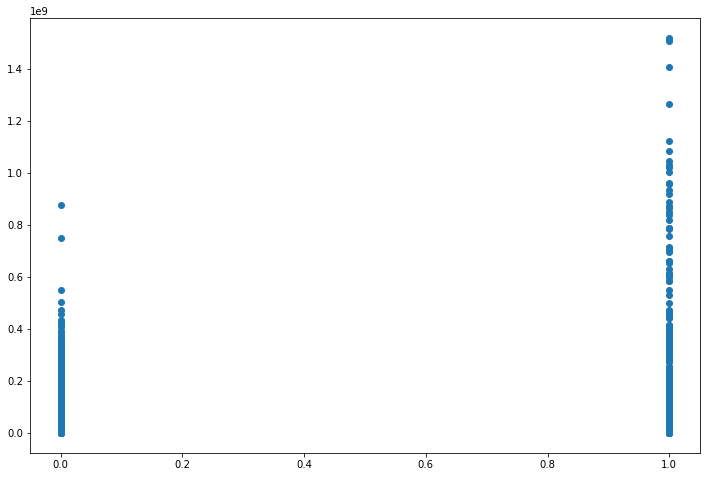

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['hasHomepage'], y_train['revenue'])
plt.show()

In [21]:
dataset['hasHomepage'] = dataset['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
dataset = dataset.drop(['homepage'], axis=1)

IMDB ID

In [22]:
dataset = dataset.drop(['imdb_id'], axis=1)

ORIGINAL LANGUAGE

In [23]:
list_of_languages = []
for lan in x_train['original_language']:
    list_of_languages.append(lan)
print(Counter(list_of_languages))
unique_languages = set(list_of_languages)
len(unique_languages)

Counter({'en': 2051, 'fr': 60, 'ru': 43, 'hi': 35, 'es': 33, 'ja': 29, 'it': 19, 'ko': 18, 'de': 17, 'cn': 16, 'zh': 16, 'ta': 15, 'sv': 6, 'nl': 5, 'pt': 5, 'ro': 4, 'da': 4, 'fa': 3, 'no': 2, 'te': 2, 'pl': 2, 'ml': 2, 'fi': 2, 'id': 1, 'hu': 1, 'el': 1, 'ur': 1, 'sr': 1, 'nb': 1, 'ar': 1, 'he': 1, 'bn': 1, 'mr': 1, 'vi': 1})


34

In [24]:
x_train['is_english'] = x_train['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
x_train = x_train.drop(['original_language'], axis=1)

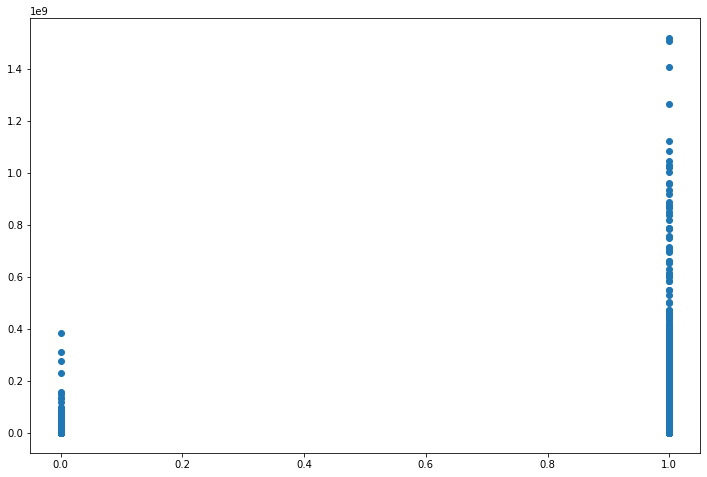

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['is_english'], y_train['revenue'])
plt.show()

In [26]:
dataset['is_english'] = dataset['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
dataset = dataset.drop(['original_language'], axis=1)

ORIGINAL TITLE

In [27]:
dataset = dataset.drop(['original_title'], axis=1)

OVERVIEW

In [28]:
dataset = dataset.drop(['overview'], axis=1)

POPULARITY

In [29]:
x_train['logPop'] = x_train['popularity'].apply(lambda x: np.log(x)) #prova

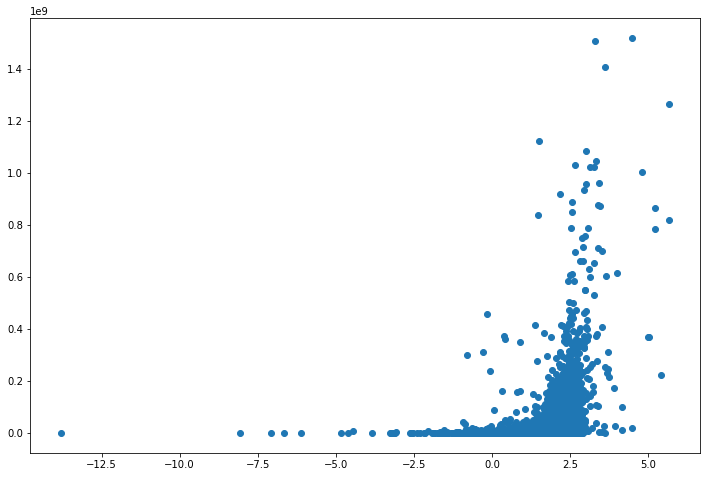

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['logPop'], y_train['revenue'])
plt.show()

In [31]:
x_train = x_train.drop(['logPop'], axis=1)

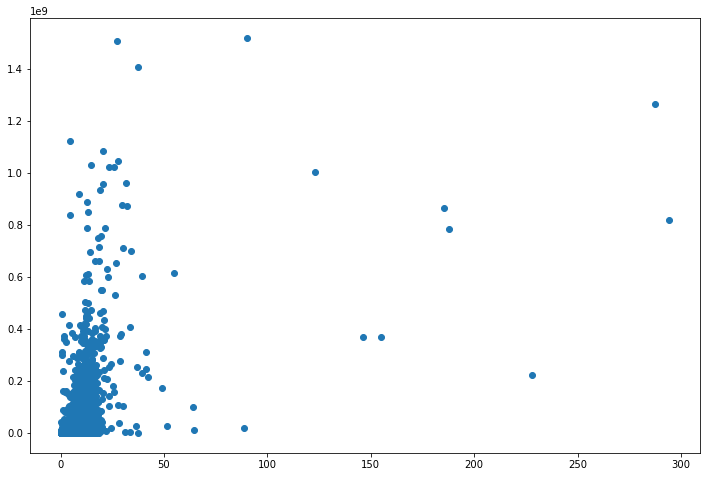

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['popularity'], y_train['revenue'])
plt.show()

POSTER PATH

In [33]:
dataset= dataset.drop(['poster_path'], axis=1)

PRODUCTION COMPANIES

In [34]:
for i, e in enumerate(x_train['production_companies']):
    for comp in e:
        print(comp['name'])

Paramount Pictures
Eddie Murphy Productions
The Geffen Company
Warner Bros.
Summit Entertainment
Saturn Films
Nu Image Films
Millennium Films
Michael De Luca Productions
Twentieth Century Fox Film Corporation
Sandollar Productions
Peter V. Miller Investment Corp.
Universal Pictures
Fuji Television Network
Dentsu
Apatow Productions
Geetha Arts
Bazmark Films
Ingenious Film Partners
Twentieth Century Fox Film Corporation
Dune Entertainment III
ScreenWest
Telefe
A Contracorriente Films
Pampa Films
Directv
Miramax Films
Miramax Films
Lions Gate Films
Ventanarosa Productions
Handprint Entertainment
Wonderland Sound and Vision
CBS Films
Vast Entertainment
Touchstone Pictures
Silver Screen Partners IV
Universal International Pictures (UI)
Paramount Pictures
Alfran Productions
De Laurentiis Entertainment Group (DEG)
Famous Films (II)
International Film Corporation
United Artists
Independent Film Distributors
Romulus Films
Universal Pictures
Hollywood Pictures
DreamWorks SKG
Jinks/Cohen Company


Freerunning
Melbarken
Saban Films
Cowtown Cinema Ventures
Columbia Pictures
Red Om Films
Plan B Entertainment
SLB Films Pvt. Ltd.
Metro-Goldwyn-Mayer (MGM)
Team Todd
Blumhouse Productions
Yari Film Group (YFG)
Blumhouse Productions
Blue-Tongue Films
Huayi Brothers Media
STX Entertainment
Ahimsa Films
Eros International
Illuminati Films Pvt Ltd
Prime Focus
Malpaso Productions
Warner Bros.
Arc Entertainment
Sivashakthi Movie Makers
Aascar Films
Raaj Kamal Films International
PVP Cinema
Twentieth Century Fox Film Corporation
Senator Film Produktion
Wildwood Enterprises
Sound for Film
Inca Films S.A.
Filmfour
BD Cine
Tu Vas Voir Productions
Sahara Films
Alfred J. Hitchcock Productions
Paramount Pictures
Eurasia Investments
A Band Apart
Dimension Films
Los Hooligans Productions
Miramax
Columbia Pictures Corporation
Dimension Films
Troublemaker Studios
Indian Paintbrush
Fono Roma
Les Films Corona
The Criterion Collection
Paramount Pictures
Appian Way
EMJAG Productions
Red Granite Pictures
Si

Big Screen Productions
TSG Entertainment
Warner Bros.
Don Bluth
Village Roadshow Pictures
DC Comics
Lonely Film Productions GmbH & Co. KG.
Donners' Company
Branded Entertainment/Batfilm Productions
Weed Road Pictures
3 Art Entertainment
Di Bonaventura Pictures
Warner Bros.
De Laurentiis Entertainment Group (DEG)
Marvel Productions
Hasbro
Sunbow Productions
Serendipity Point Films
Egoli Tossell Film AG
A24
New Line Cinema
The Turman-Morrissey Company
Savoy Pictures
ATO Pictures
Columbia Pictures
Penta Pictures
Pentamerica
Infinity Features Entertainment
FilmEngine
Denver and Delilah Productions
Icon Entertainment International
Claussen Wöbke Putz Filmproduktion
naked eye filmproduction GmbH & Co. KG
Isle of Man Film
CinemaNX
Why Not Productions
Wild Bunch
Prima Linéa Productions
Belvision
Arte France Cinéma
Studio Ghibli
CN4 Productions
Universal Pictures
Tales From The Crypt Holdings
Universal City Studios
Columbia Pictures
Media Rights Capital
Sony Pictures Entertainment (SPE)
Alpha C

Open City Films
Anhelo Productions
Appian Way
Columbia Pictures
Revolution Studios
Happy Madison Productions
Televisión Española (TVE)
AXN
Televisió de Catalunya (TV3)
Canal+ España
Instituto de la Cinematografía y de las Artes Audiovisuales (ICAA)
Instituto de Crédito Oficial (ICO)
Rodar y Rodar Cine y Televisión
Institut Català de les Empreses Culturals (ICEC)
Imagine Entertainment
Universal Pictures
Warner Bros.
Lionsgate
Saban Brands
Scott Rudin Productions
RT Features
Pine District Pictures
Dimension Films
Troublemaker Studios
Miramax
Rakontur
Miramax Films
Imagine Entertainment
Universal Pictures
Parkway Pictures (I)
Touchstone Pictures
Snoot Entertainment
Sony Pictures Classics
Bob Yari Productions
Walt Disney Pictures
Boxing Cat Films
Outlaw Productions (I)
Santa Frost Productions
Les Films d'Ici
Bridgit Folman Film Gang
Razor Film Produktion
Twentieth Century Fox Film Corporation
Davis Entertainment
Darko Entertainment
Freeman Film
Subotica Entertainment
Walt Disney Pictures
W

Memento Films Production
Arte France Cinéma
Doha Film Institute
Farhadi Film Production
United Artists
Zoetrope Studios
Gotham Group
Temple Hill Entertainment
TSG Entertainment
Universal Pictures
Universal Pictures
Carmel Entertainment
Provident Films
Samuel Goldwyn Films
Affirm Films
Sherwood Pictures
Original Film
Columbia Pictures Corporation
Neal H. Moritz Productions
Smokewood Entertainment
Relativity Media
Twentieth Century Fox Film Corporation
DreamWorks Animation
Fabula
CBS Films
Millennium Films
Chartoff-Winkler Productions
Scared Productions
Nu Image Entertainment GmbH
Rai Cinema
Redwave Films
Protagonist Pictures
19 Entertainment
Beijing Enlight Pictures
United Artists
Eon Productions
Warner Bros.
Moving Picture Company (MPC)
Berlanti Productions
RatPac-Dune Entertainment
Le Pacte
Zanuck Independent
Voltage Pictures
MediaPro Pictures
Zephyr Films
Picture Perfect Corporation
Wild Side Films
Paradis Films
Nu Image Films
Langley Productions
Thunder Road Productions
Fuqua Films


In [35]:
x_train['list_of_companies'] = x_train['production_companies'].apply(lambda x: [comp['name'] for comp in x])

In [36]:
list_of_companies = []
for l in x_train['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)

print(len(list_of_companies))
unique_companies = set(list_of_companies)
print(len(unique_companies))
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

6506
3183


In [37]:
top_20_comp

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Columbia Pictures Corporation',
 'Walt Disney Pictures',
 'TriStar Pictures',
 'Canal+',
 'Relativity Media',
 'United Artists',
 'Village Roadshow Pictures',
 'Miramax Films',
 'Regency Enterprises',
 'Dune Entertainment',
 'Fox Searchlight Pictures',
 'Lionsgate']

In [38]:
x_train['companies_count'] = x_train['list_of_companies'].apply(lambda x: len(x))

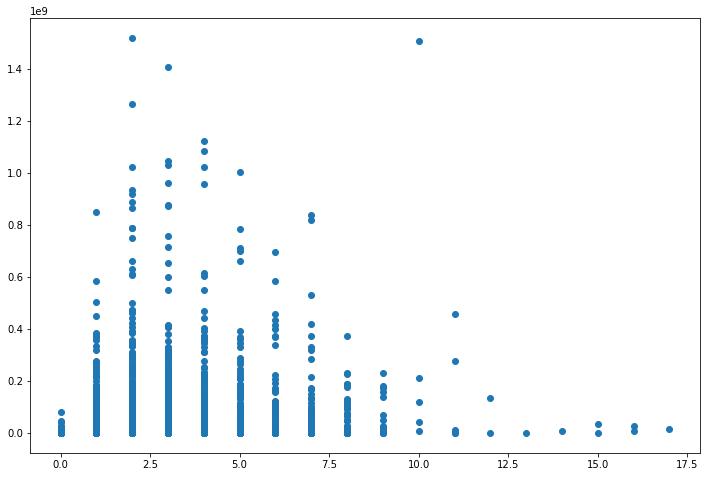

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['companies_count'], y_train['revenue'])
plt.show()

In [40]:
checked_companies = []
for i, l in enumerate(x_train['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            x_train[colName] = pd.Series([1 if comp in x else 0 for x in x_train['list_of_companies']], index =x_train.index)


In [41]:
print(sum(x_train['isColumbia Pictures Corporation']))
top_20_comp_pair

47


[('Warner Bros.', 164),
 ('Universal Pictures', 149),
 ('Paramount Pictures', 126),
 ('Twentieth Century Fox Film Corporation', 96),
 ('Columbia Pictures', 80),
 ('Metro-Goldwyn-Mayer (MGM)', 68),
 ('New Line Cinema', 60),
 ('Touchstone Pictures', 51),
 ('Columbia Pictures Corporation', 47),
 ('Walt Disney Pictures', 43),
 ('TriStar Pictures', 43),
 ('Canal+', 38),
 ('Relativity Media', 38),
 ('United Artists', 37),
 ('Village Roadshow Pictures', 33),
 ('Miramax Films', 29),
 ('Regency Enterprises', 28),
 ('Dune Entertainment', 26),
 ('Fox Searchlight Pictures', 25),
 ('Lionsgate', 24)]

In [42]:
x_train = x_train.drop(['production_companies'], axis=1)
x_train = x_train.drop(['list_of_companies'], axis=1)
x_train = x_train.drop(['companies_count'], axis=1)

isWarner Bros.


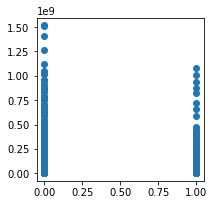

isUniversal Pictures


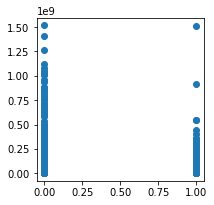

isParamount Pictures


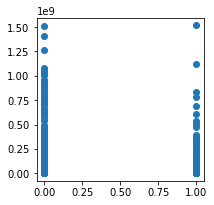

isTwentieth Century Fox Film Corporation


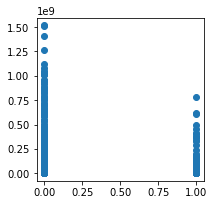

isColumbia Pictures


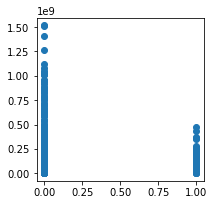

isMetro-Goldwyn-Mayer (MGM)


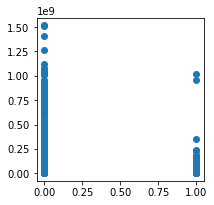

isNew Line Cinema


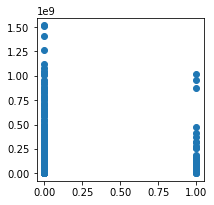

isTouchstone Pictures


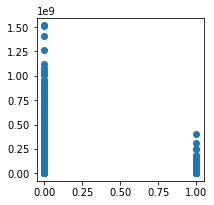

isColumbia Pictures Corporation


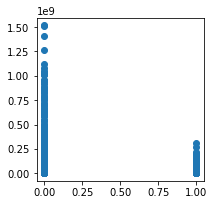

isWalt Disney Pictures


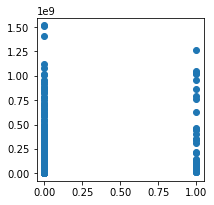

isTriStar Pictures


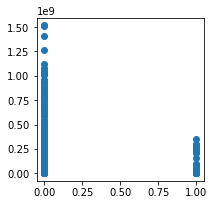

isCanal+


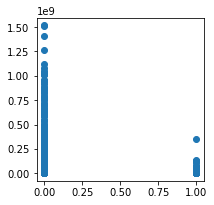

isRelativity Media


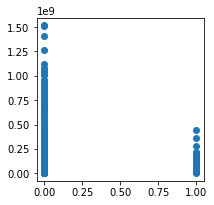

isUnited Artists


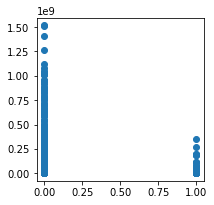

isVillage Roadshow Pictures


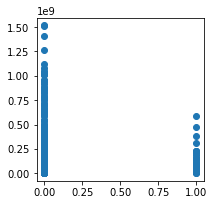

isMiramax Films


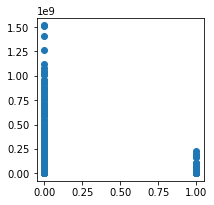

isRegency Enterprises


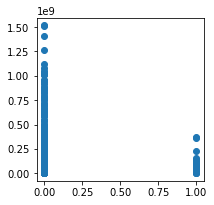

isDune Entertainment


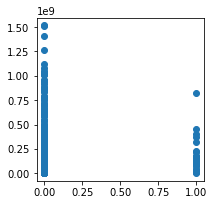

isFox Searchlight Pictures


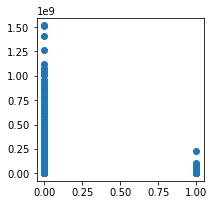

isLionsgate


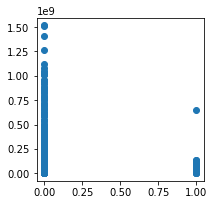

In [43]:
for comp in top_20_comp:
    col = 'is' + comp
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(x_train[col], y_train['revenue'])
    plt.show()

In [44]:
dataset['list_of_companies'] = dataset['production_companies'].apply(lambda x: [comp['name'] for comp in x])
list_of_companies = []
for l in dataset['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)
unique_companies = set(list_of_companies)
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

dataset['companies_count'] = dataset['list_of_companies'].apply(lambda x: len(x))
checked_companies = []
for i, l in enumerate(dataset['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            dataset[colName] = pd.Series([1 if comp in x else 0 for x in dataset['list_of_companies']], index =dataset.index)
dataset = dataset.drop(['production_companies'], axis=1)
dataset = dataset.drop(['list_of_companies'], axis=1)
dataset = dataset.drop(['companies_count'], axis=1)
dataset.head()

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,isColumbia Pictures Corporation,isTriStar Pictures,isColumbia Pictures,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,0,0,0,0,0,0,0,0,0,0
2,4.000000e+07,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,0,0,0,0,0,0,0,0,0,0
3,3.300000e+06,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,1.200000e+06,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,0,0,0,0,0,0,0,0,0,0
5,3.142419e+07,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],...,0,0,0,0,0,0,0,0,0,0


PRODUCTION COUNTRIES

In [45]:
print(x_train[['production_countries', 'is_english']])
dataset = dataset.drop(['production_countries'], axis=1)

                                   production_countries  is_english
id                                                                 
643   [{'iso_3166_1': 'US', 'name': 'United States o...           1
701   [{'iso_3166_1': 'US', 'name': 'United States o...           1
227   [{'iso_3166_1': 'US', 'name': 'United States o...           1
1698  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           1
1011  [{'iso_3166_1': 'US', 'name': 'United States o...           1
...                                                 ...         ...
1639            [{'iso_3166_1': 'JP', 'name': 'Japan'}]           0
1096  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           1
1131  [{'iso_3166_1': 'US', 'name': 'United States o...           1
1295  [{'iso_3166_1': 'US', 'name': 'United States o...           1
861   [{'iso_3166_1': 'US', 'name': 'United States o...           1

[2400 rows x 2 columns]


RELEASE DATE

In [46]:
date = '01/02/93'
dmy = date.split('/')
integer_map = map(int, dmy)
dmy_int = list(integer_map)
dmy_int

[1, 2, 93]

In [47]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 21:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

x_train['release_date'] = x_train['release_date'].apply(lambda x: fix_date(x))

In [48]:
x_train['release_date'] = x_train['release_date'].apply(lambda x: x.split('/'))

In [49]:
x_train['release_day'] = pd.Series([x[1] for x in x_train['release_date']], index =x_train.index)
x_train['release_day'] = x_train['release_day'].astype(int)
x_train['release_month'] = pd.Series([x[0] for x in x_train['release_date']], index =x_train.index)
x_train['release_month'] = x_train['release_month'].astype(int)
x_train['release_year'] = pd.Series([x[2] for x in x_train['release_date']], index =x_train.index)
x_train['release_year'] = x_train['release_year'].astype(int)
x_train.info()
x_train = x_train.drop(['release_date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 643 to 861
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     2400 non-null   object 
 1   budget                                    2400 non-null   float64
 2   imdb_id                                   2400 non-null   object 
 3   original_title                            2400 non-null   object 
 4   overview                                  2392 non-null   object 
 5   popularity                                2400 non-null   float64
 6   poster_path                               2399 non-null   object 
 7   production_countries                      2400 non-null   object 
 8   release_date                              2400 non-null   object 
 9   runtime                                   2398 non-null   float64
 10  spoken_languages                   

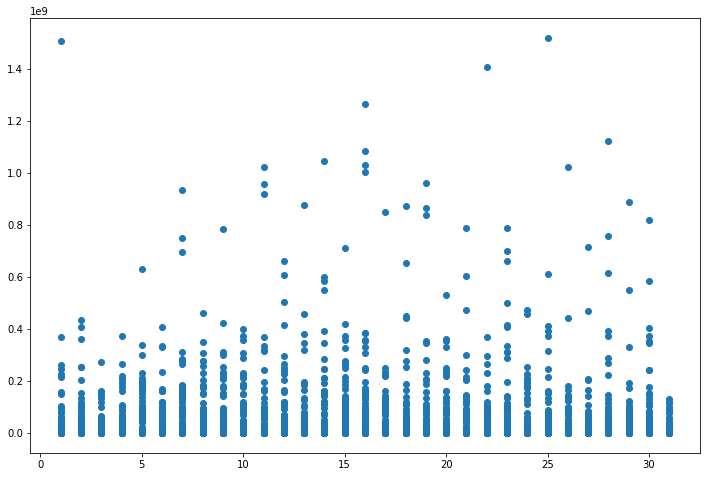

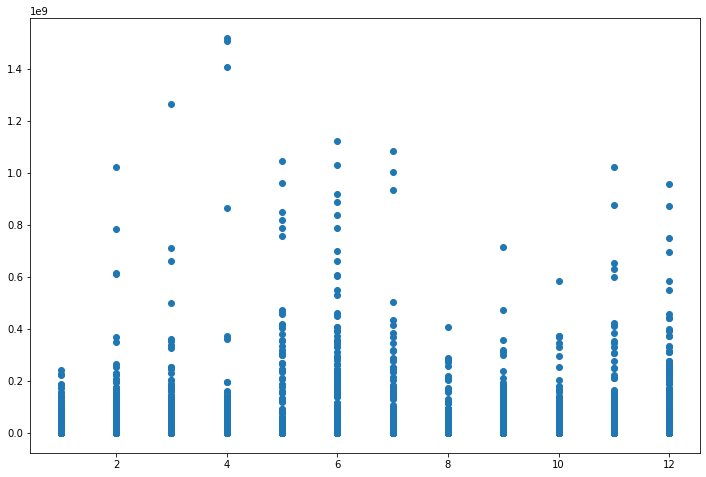

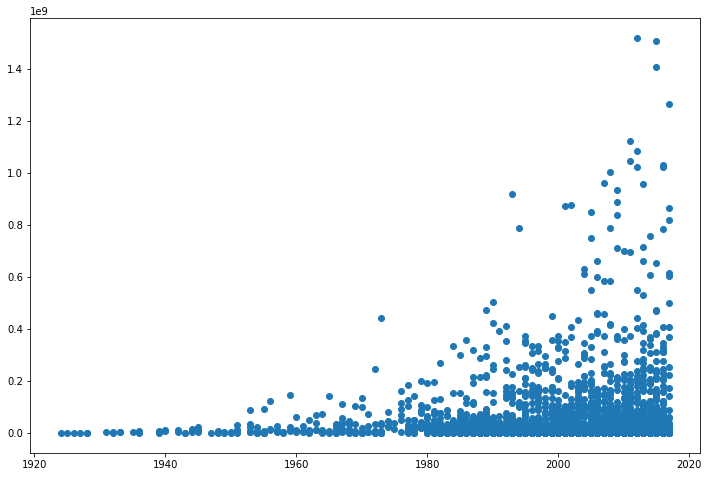

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_day'], y_train['revenue'])
plt.show()
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_month'], y_train['revenue'])
plt.show()
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_year'], y_train['revenue'])
plt.show()

In [51]:
dataset['release_date'] = dataset['release_date'].apply(lambda x: fix_date(x))
dataset['release_date'] = dataset['release_date'].apply(lambda x: x.split('/'))
dataset['release_day'] = pd.Series([x[1] for x in dataset['release_date']], index =dataset.index)
dataset['release_day'] = dataset['release_day'].astype(int)
dataset['release_month'] = pd.Series([x[0] for x in dataset['release_date']], index =dataset.index)
dataset['release_month'] = dataset['release_month'].astype(int)
dataset['release_year'] = pd.Series([x[2] for x in dataset['release_date']], index =dataset.index)
dataset['release_year'] = dataset['release_year'].astype(int)
dataset = dataset.drop(['release_date'], axis=1)

RUNTIME

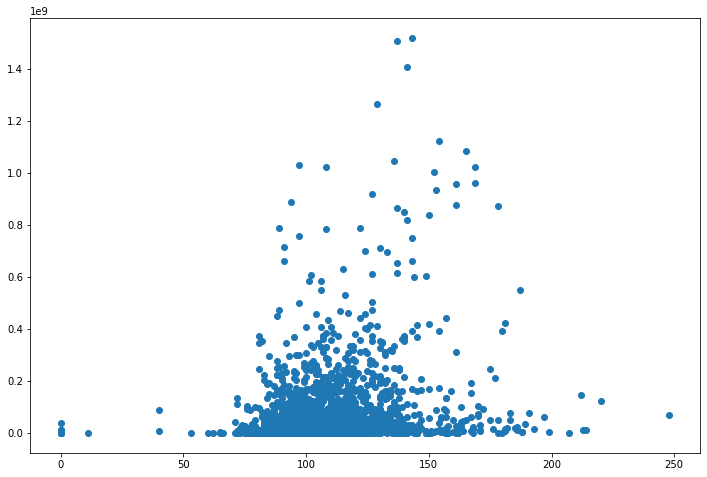

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['runtime'], y_train['revenue'])
plt.show()

In [53]:
x_train[pd.isna(x_train['runtime'])]

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isWalt Disney Pictures,isLionsgate,isCanal+,isTriStar Pictures,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
2303,[],3.085483e+07,tt0116485,Happy Weekend,NaN,0.002229,NaN,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",...,0,0,0,0,0,0,0,14,3,1996
1336,[],6.000000e+06,tt1107828,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,[],NaN,[],...,0,0,0,0,0,0,0,29,10,2007


In [54]:
x_train.iloc[2302, x_train.columns.get_loc('runtime')] = 90
x_train.iloc[1335, x_train.columns.get_loc('runtime')] = 130

In [55]:
dataset[pd.isna(dataset['runtime'])]

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1336,6.000000e+06,0.292296,NaN,[],Released,NaN,Королёв,[],"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",...,0,0,0,0,0,0,0,29,10,2007
2303,3.142419e+07,0.002229,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",[],...,0,0,0,0,0,0,0,14,3,1996


In [56]:
dataset.iloc[2302, dataset.columns.get_loc('runtime')] = 90
dataset.iloc[1335, dataset.columns.get_loc('runtime')] = 130

SPOKEN LANGUAGES

In [57]:
dataset = dataset.drop(['spoken_languages'], axis=1)

<!-- STATUS #da qua -->

In [58]:
for i,e in enumerate(x_train['status']):
    if(e!='Released'):
        print (i,e)

1171 Rumored
1427 Rumored


In [59]:
x_train.iloc[1171]#vabbè

belongs_to_collection                       [{'id': 144200, 'name': 'Swan Princess Series'...
budget                                                                        30854833.026964
imdb_id                                                                             tt0120254
original_title                                 The Swan Princess: Escape from Castle Mountain
overview                                    The first wedding anniversary of Princess Odet...
popularity                                                                           5.121309
poster_path                                                  /oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg
production_countries                                                                       []
runtime                                                                                  71.0
spoken_languages                            [{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...
status                                                      

In [60]:
dataset = dataset.drop(['status'], axis=1)

TAGLINE

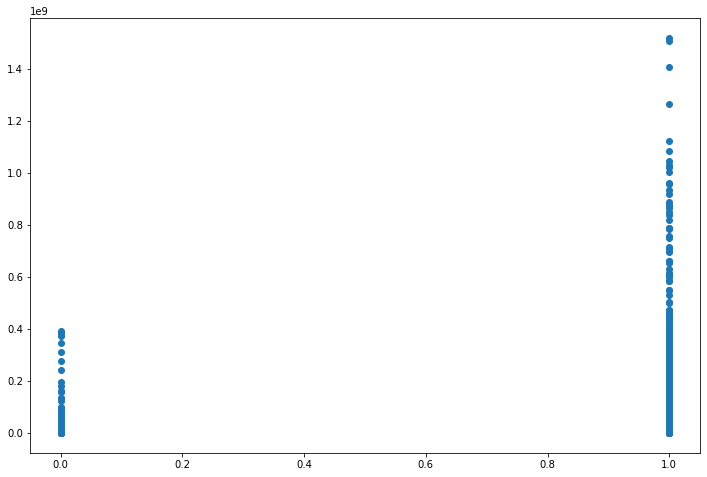

In [61]:
x_train['hasTagline'] = x_train['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
plt.figure(figsize=(12,8))
plt.scatter(x_train['hasTagline'], y_train['revenue'])
plt.show()

In [62]:
dataset = dataset.drop(['tagline'], axis=1)

TITLE

In [63]:
dataset = dataset.drop(['title'], axis=1)

KEYWORDS

In [64]:
for i, e in enumerate(x_train['Keywords']):
    print (i)
    for comp in e:
        print(comp['name'])

0
fast food restaurant
prince
heir to the throne
fish out of water
new york city
fake identity
duringcreditsstinger
searching for love
1
flower
solar eclipse
florist
assistant
plant
success
aggression by plant
investigation
nerd
blonde
carnivorous plant
remake
crush
based on play or musical
motorcycle
eclipse
part animated
dentist
bum
killer plant
skid row
based on movie
plant food
flesh eating plant
inept assistant
cult classic
man eating plant
2
bone
car explosion
premarital sex
satanic cult
driver's license
finger gun
backhand slap
car jump
man punching a woman
magic trick
3
germany
based on novel
nazis
double agent
4
alcohol
one-night stand
5
tattoo
short-term memory
6
missionary
world war ii
ranch
australia
british
racist
cattle drive
aftercreditsstinger
stampede
waltzing matilda
trampled to death
7
isolation
cabin
snow
hunt
dark past
8
puberty
first time
9
painter
love of one's life
disabled
woman director
10
high school
teenager
popularity
high school student
teen comedy
duringc

london england
mother
robbery
detective
assassin
hitman
insomnia
apprentice
remake
revenge
murder
gangster
crime
art
surveillance
225
competition
running
career
idol
racing car
226
prison
general
227
corruption
assassination
detective
journalist
assassin
newspaper
congress
editor-in-chief
conspiracy of murder
politics
election campaign
government
murder
thriller
blog
reporter
228
germany
prison
music record
adultery
country music
guitar
loss of brother
concert
marriage
single
accident
1960s
229
martial arts
stadium
champion
shaolin
steel helmet
soccer
230
musical
political
231
loss of lover
mountain lake
author
rabbit
232
horror
ouija
spirit
game
233
joke
freak
absurdism
234
woman director
235
independent film
236
car race
car journey
car mechanic
auto
car garage
auto-tuning
drifting
car
automobile racing
237
biography
238
cinema
hiding place
machinegun
prison guard
escape from prison
dillinger
239
california
spy
hero
horseback riding
sword fight
revenge
240
gay
drug abuse
florida
figh

tamil
tollywood
rameshwaram
masala
south india
416
417
new zealand
maori
revenge
historical society
tribal warfare
418
war crimes
mass murder
war victim
sino japanese war
massacre
japanese army
duringcreditsstinger
imperial japan
419
homeless
lice
420
piracy
hacking
court trial
421
foreigner
department store
magic
mannequin
prince
hot air balloon
time travel
sword fight
chase scene
credit card
sorcerer
spell
dating
fashion
disguise
pop music
makeover
security guard
gay lead character
dance club
videotape
shirtless men
eating out
making breakfast scene
heroic rescue
pink cadillac
shopping montage
422
dying and death
time travel
romance
dinosaur
423
mass murder
song
brother
sister
aftercreditsstinger
424
mother
murder
train
ex-wife
425
supernatural
remake
suspense
beer bottle
real time
candelabra
reference to facebook
padlock
woman director
426
fairy tale
villain
sleeping beauty
dark fantasy
based on fairy tale
adaptation
retelling
literary adaptation
3d
427
witch
magic
broom
school of w

female protagonist
post world war ii
woman director
586
android
dystopia
alien
spin off
creation
emergency surgery
aftercreditsstinger
stasis
archeological dig
god complex
cave drawing
genetic mutation
origins of life
587
michigan
1970s
youth
family
woman director
588
brother brother relationship
589
sister sister relationship
anonymous letter
diva
bodyguard
oscar award
los angeles
590
kidnapping
thief
teenager
violence
held captive
blind
break in
blind man
trapped in a house
591
homosexuality
transgender
family
lgbt
drag
romantic drama
social issues
self-liberation
fearless
sex change operation
592
supernatural
prequel
possession
ouija board
spirit
ghost
aftercreditsstinger
1960s
593
female nudity
runaway
commune
egg
independent film
arson
incest
illness
environmentalism
diabetic
face slap
peeping tom
scythe
woman director
594
prostitute
grandfather granddaughter relationship
friendship
tension
park
tenement
blind
blindness
innocence lost
abuse
595
creature
based on children's book
ch

spider bite
creature feature
spider queen
animal attack
spiders
invasive species
arachnophobia
animal horror
spider general
735
vietnam veteran
kuwait
new age
staring contest
drug use
paranoid fantasy
hippie lifestyle
736
dual identity
mistake in person
college
success
wealth
737
menace
adoption
dangerous
adoptive father
threat to death
step father
murder
divorce
ex-wife
child
murder hunt
738
independent film
woman director
739
social work
social worker
human animal relationship
whale
freedom
best friend
amusement park
aftercreditsstinger
740
love triangle
friendship
dating
sushi bar
exploding airplane
online dating
stable
karate class
dog shelter
741
comedy
wedding
742
743
transvestism
robbery
martial arts
jazz
finger
vice
police
revenge
murder
scam
prostitution
gangster
white slavery
744
suburb
745
virtual reality
dystopia
moral conflict
computer
loneliness
water shortage
teacher
746
dc comics
crime fighter
terrorist
secret identity
burglar
hostage drama
time bomb
gotham city
vigilan

zombie
alien abduction
found footage
mumblegore
vhs tapes
933
group sex
biker
motor sport
independent film
934
secret love
mohawk
native american
18th century
french and indian war
935
small town
train accident
936
usa
vietnam veteran
submachine gun
prisoner
prisoners of war
liberation of prisoners
liberation
vietnam
vietnam war
chase
machinegun
u.s. army
forest
photography
government
war
revenge
soldier
agent
denunciation
937
london england
berlin
usa
spy
cia
cuba
wife husband relationship
mentor
return
cold war
kongo
leaving one's family
kgb
childhood memory
wife
invasion
bay of pigs
family
child
938
amnesia
chaos theory
blackout
time travel
flashback
939
world war ii
prisoners of war
biography
sport
war
athlete
woman director
olympic athlete
940
paris
sex
jealousy
secret
restaurant
love
relationship
las vegas
chef
941
new york
heroin
money
criminal
942
nun
based on novel
bath tub
nightmare
son
sequel
remake
vision
good vs evil
woman reporter
mental institution
videotape
evil child
9

business man
investigation
music
police
suspense
singer
french noir
film noir
1123
ex-girlfriend
love
friends
destiny
spanish
woman director
actor
1124
dancing
spy
terrorist
traitor
airplane
violin
based on tv series
legs
1125
exploitation
biography
hospital
curiosity
sideshow
disfigurement
physical deformity
freak
19th century
dignity
1126
new york
marriage proposal
alabama
career woman
fashion designer
1127
chipmunk
cgi
talking animal
aftercreditsstinger
duringcreditsstinger
1128
trailer park
gun
texas
deal
psychopath
sexual humiliation
money
lingerie
arson
drug
police detective
physical abuse
neo-noir
burial
pizza shop
1129
corruption
journalist
based on novel
blackmail
manipulation
bodyguard
louisiana
scandal
power
governor
politics
tragedy
mistress
aristocrat
1130
tall man
romania
giant
1131
angel
church choir
gospel
reverend
crisis of faith
woman director
1132
1133
hunter
mountain
tiger
snow
korean movie
1134
1135
rap music
pennsylvania
brother sister relationship
farm
grandparen

batgirl
1256
england
brother sister relationship
new love
castle
studies
innocence
loss
oxford
nobility
1257
suspense
1258
china
nepal
pilot
afghanistan
aerial combat
alcoholic
socialite
biplane
declared dead
1259
1260
alternate dimension
new age
parallel world
pseudoscience
theology
consciousness
quantum mysticism
fantasy docudrama
woman director
1261
duringcreditsstinger
1262
hotel
wife husband relationship
hitman
infection
forest
cult
priest
murderer
brutality
bonfire
ceremony
ex soldier
ritual sacrifice
contract killer
video tape
folk horror
mumblegore
1263
1264
engagement
wedding
pretend relationship
1265
sex
adultery
group sex
bisexuality
1266
street gang
uncle
female assassin
witness to murder
1267
1268
circus
lion
eccentric
robot
1269
car race
future
young prostitute
chinese
alcoholic
tofu
1270
dystopia
1271
upper class
loss of mother
great britain
sadness
queen
monarchy
paparazzi
prime minister
headline
oscar award
dying and death
queen elisabeth ii
prince charles
buckingham p

gopher
1497
monster
1498
moon
cinema
vampire
werewolf
fang vamp
1499
new york
vatican
dutch
wheelchair
exorcism
possessed
scientist
demon
exorcist
wheelchair bound
1500
film making
high school
sequel
serial killer
slasher
aftercreditsstinger
1501
himalaya
photographer
magazine
iceland
daydream
photograph
shark
fired from the job
skateboard
dreamer
online dating
daydreaming
1502
car race
loss of brother
chimp
family
duringcreditsstinger
woman director
1503
coffin
hitman
lone wolf
stetson
spaghetti western
django
1504
brother brother relationship
dysfunctional family
india
train attendant
drinking syrup
healing
steward
catharsis
1505
prostitute
capitalism
usa president
arena
congress
future
human experimentation
dystopia
army
stupidity
hibernation
dark comedy
social satire
brainwashing
surveillance
u.s. congress
dystopic future
mass media
1506
beach
tennis player
job interview
independent film
male female relationship
1507
dolphin
island
research
tourist
town
1508
jupiter
wife husband re

cia
violence
safe house
rogue agent
cape town south africa
soccer stadium
1644
egypt
miracle
slavery
israeli
epic
religion
judaism
pharaoh
biblical
1645
vampire
crucifixion
post-apocalyptic
dystopia
vampire hunter
disobey
niece
dark hero
1646
graffiti
hell
anthology
shot in the crotch
woman director
1647
shakespeare
sister
high school
cannabis
deception
teen movie
shrew
archery
feel-good ending
opposites attract
duringcreditsstinger
teenage romance
play adaptation
overprotective father
1648
love triangle
man between two women
coming of age
1649
riddle
treasure
heart
skeleton
treasure hunt
torture
violence
monkey
cult film
archaeologist
thuggee
conveyor belt
mine car
rope bridge
belching
child driving a car
eating brains
splits
indiana jones
archeology 
1650
italy
poker
casino
terrorist
banker
money
free running
torture
british secret service
montenegro
1651
helicopter
sniper
iraq
murder
soldier
iraq war
trapped
desert
1652
suicide attempt
drama
love
bollywood
1653
italian
new love
prov

gangster boss
dystopia
police operation
attempt to escape
cyberpunk
reluctant hero
1828
philosophy
mentor
artist
painting
friendship
teen movie
teenager
sketching
rebellious youth
1829
tokyo japan
1830
gay
loss of mother
secret
coming out
loss of father
cancer
lgbt elderly
1831
high school
school
woman director
1832
based on manga
1833
murder
suspense
union
dock
longshoreman
pigeon
1834
brother sister relationship
class
foot race
1835
transylvania
hotel
witch
technology
magic
mummy
dracula
skeleton
only child
backpacker
marriage
frankenstein
wolfman
zombie
moving out
invisible man
new life
1836
arbitrary law
covered investigation
uniform
investigation
inspector
vigilante
bad cop
1837
artificial intelligence
secret identity
computer program
dystopia
computer
deception
duel
motorcycle
neon light
autocracy
1838
1839
based on novel
cat
human animal relationship
biography
addiction
drug addict
recovering drug addict
moral transformation
street musician
busker
unlucky
1840
friendship
police


based on comic
loss of virginity
criminal
super powers
phantom zone
rocket fired grenade
crystal machine
superhuman strength
duringcreditsstinger
2017
parody
parallel world
2018
robbery
santa claus
armor
disguise
2019
london england
submarine
england
assassination
spy
cairo
terrorist
egypt
mass murder
pyramid
russia
planned murder
secret intelligence service
kgb
villain
nuclear missile
tanker
sphinx
sardinien
warhead
jet ski
utopia
murder
shark
killer
british secret service
skiing
2020
clock tower
infidelity
honeymoon
self-defense
waterfall
postcard
delirium
niagara falls
murder
morgue
tour guide
fear
pursuit
hitchcockian
screaming
unconsciousness
film noir
adultress
2021
new york
israel
middle east
hairdresser
ladykiller
mossad
israeli
palestinian
heart-throb
middle east conflict
hairstyle
hacky sack
2022
paranoia
double
2023
sister sister relationship
exorcism
rhode island
based on true story
farmhouse
paranormal investigation
ghost
supernatural power
paranormal investigator
annabell

cadet
military academy
hostile takeover
teenager fighting adult
die hard scenario
last stand
military school
older man younger man relationship
military funeral
2191
casual meeting
restart
job interview
underclass
consumption
class
movie star
aftercreditsstinger
duringcreditsstinger
2192
assassin
wolf
maryland
suicide by gunshot
rooftop
exploding house
laptop
tracking device
fake id
seoul south korea
pharmaceutical lab
government conspiracy
roof chase
manila philippines
hunted
false passport
alberta canada
lieutenant general
2193
sport
male female relationship
soccer
2194
comedian
cancer
marijuana
older man younger woman relationship
drug
stand-up comedian
audition
aging actor
divorced man
divorced father
award
actor
estranged daughter
2195
criminal
2196
love triangle
afterlife
day of the dead
bullfighting
2197
coronation
duty
marriage
falling in love
2198
investigation
memory loss
2199
africa
based on novel
child soldier
2200
musical
cancer
2201
doctor
india
english
magistrate
1920s
m

skinhead
england
vandalism
independent film
gang
racism
summer
youth
violence
drug
unemployment
xenophobia
culture
2375
lake
summer camp
murder
serial killer
slasher
summer
jason voorhees
one by one
friday the thirteenth
2376
gunslinger
anti terror
ambush
mexico
showdown
guitar
nudity
hitman
bartender
revenge
tragic hero
shootout
mariachi
explosion
extreme violence
brutality
drug lord
leg brace
concealed weapon
flashback
bookstore
2377
amsterdam
based on novel
support group
cancer
teenager
star crossed lovers
teen drama
oxygen tank
based on young adult novel
2378
number in title
historical fiction
musketeer
17th century
3d
2379
sport
duringcreditsstinger
2380
based on novel
woman director
2381
nitrous oxide
candid camera
double act
political satire
crooked politician
woman director
2382
prison
irish-american
juvenile prison
2383
california
san francisco
killing
journalist
newspaper
mass murder
planned murder
embassy
victim
threat to death
victim of murder
code
police
murder
serial kill

In [65]:
x_train['list_of_keywords'] = x_train['Keywords'].apply(lambda x: [comp['name'] for comp in x])

In [66]:
list_of_keywords = []
for l in x_train['list_of_keywords']:
    for key in l:
        list_of_keywords.append(key)

print(len(list_of_keywords))
unique_keywords = set(list_of_keywords)
print(len(unique_keywords))
top_50_keys_pair = Counter(list_of_keywords).most_common(50)
top_50_keys = []
for p in top_50_keys_pair:
    top_50_keys.append(p[0])
Counter(list_of_keywords).most_common(50)

17326
6488


[('woman director', 132),
 ('independent film', 120),
 ('duringcreditsstinger', 105),
 ('murder', 95),
 ('based on novel', 83),
 ('sport', 71),
 ('violence', 68),
 ('revenge', 65),
 ('dystopia', 64),
 ('friendship', 62),
 ('aftercreditsstinger', 57),
 ('sex', 57),
 ('biography', 57),
 ('love', 51),
 ('suspense', 51),
 ('sequel', 49),
 ('police', 49),
 ('drug', 46),
 ('teenager', 43),
 ('nudity', 43),
 ('female nudity', 41),
 ('high school', 40),
 ('prison', 40),
 ('los angeles', 38),
 ('musical', 37),
 ('family', 35),
 ('kidnapping', 34),
 ('father son relationship', 34),
 ('new york', 33),
 ('detective', 32),
 ('3d', 32),
 ('investigation', 31),
 ('based on comic', 31),
 ('london england', 30),
 ('paris', 29),
 ('corruption', 29),
 ('remake', 28),
 ('robbery', 28),
 ('wedding', 28),
 ('world war ii', 27),
 ('based on true story', 27),
 ('wife husband relationship', 27),
 ('suicide', 27),
 ('escape', 27),
 ('prostitute', 27),
 ('gay', 27),
 ('dying and death', 26),
 ('superhero', 26),


In [67]:
x_train['isInTop50Keywords'] = pd.Series([1 if list(set(x) & set(top_50_keys)) != [] else 0 for x in x_train['list_of_keywords']], index =x_train.index)

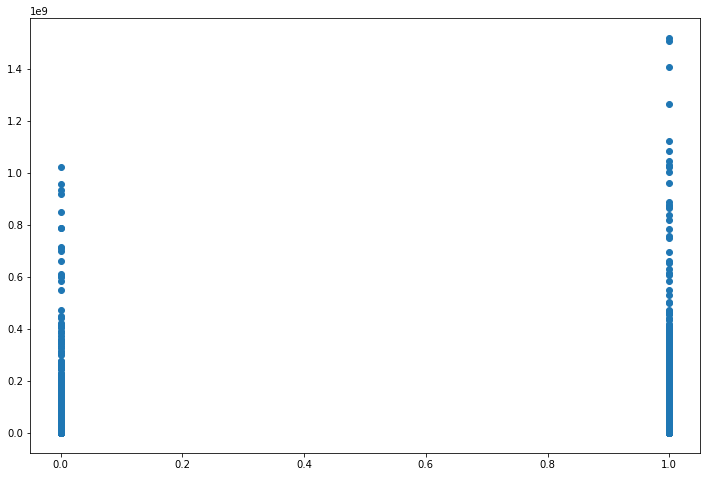

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['isInTop50Keywords'], y_train['revenue'])
plt.show()

In [69]:
x_train = x_train.drop(['isInTop50Keywords'], axis=1)

In [70]:
x_train['keywordsCount'] = x_train['list_of_keywords'].apply(lambda x: len(x))

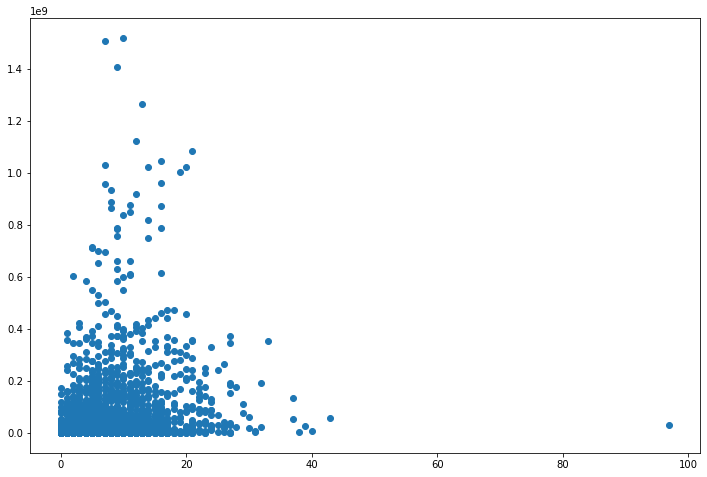

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['keywordsCount'], y_train['revenue'])
plt.show()

In [72]:
x_train = x_train.drop(['Keywords'], axis=1)
x_train = x_train.drop(['list_of_keywords'], axis=1)

In [73]:
dataset['list_of_keywords'] = dataset['Keywords'].apply(lambda x: [comp['name'] for comp in x])
dataset['keywordsCount'] = dataset['list_of_keywords'].apply(lambda x: len(x))
dataset = dataset.drop(['Keywords'], axis=1)
dataset = dataset.drop(['list_of_keywords'], axis=1)
#forse droppare keywordscount

CAST

In [74]:
for i, e in enumerate(x_train['cast']):
    for act in e:
        print(act['name'], act['gender'])

Eddie Murphy 2
Arsenio Hall 2
James Earl Jones 0
John Amos 2
Shari Headley 1
Frankie Faison 2
Louie Anderson 2
Calvin Lockhart 2
Samuel L. Jackson 2
Eriq La Salle 2
Ralph Bellamy 2
Ralph Bellamy 2
Don Ameche 2
Jim Abrahams 2
Rick Moranis 2
Ellen Greene 1
Vincent Gardenia 2
Steve Martin 2
Tisha Campbell-Martin 1
John Candy 2
Bill Murray 2
Tichina Arnold 1
Miriam Margolyes 1
Jim Belushi 2
Christopher Guest 2
Danny John-Jules 0
Mak Wilson 0
Barbara Rosenblat 0
Kevin Scott 0
Vincent Wong 2
Levi Stubbs 0
Nicolas Cage 2
Amber Heard 1
William Fichtner 2
Billy Burke 2
David Morse 2
Katy Mixon 1
Charlotte Ross 1
Christa Campbell 1
Todd Farmer 2
Jack McGee 2
Tom Atkins 2
Wanetah Walmsley 0
Edrick Browne 2
Robin McGee 0
Fabian C. Moreno 0
Marc Macaulay 2
Pruitt Taylor Vince 2
Julius Washington 0
Jamie Teer 0
Bryan Massey 0
Timothy Walter 0
Kent Jude Bernard 2
Brent Phillip Henry 0
Gerry May 0
Sherri Talley 0
Arianne Margot 0
Con Schell 2
Nick Gomez 2
Joe Chrest 2
Oakley Lehman 0
Thirl Haston 2
Ja

Penny Everingham 0
Tony Bellette 0
Jeff Dornan 0
Jay Laga'aia 2
John Walton 2
Morgan Griffin 0
Dennis Kreusler 2
Renae Smith Trevino 1
Mark Wahlberg 2
Seth MacFarlane 2
Amanda Seyfried 1
Jessica Barth 1
Giovanni Ribisi 2
Morgan Freeman 2
Sam J. Jones 2
Patrick Warburton 2
Michael Dorn 2
Bill Smitrovich 2
John Slattery 2
Cocoa Brown 1
John Carroll Lynch 2
Ron Canada 2
Liam Neeson 2
Dennis Haysbert 2
Patrick Stewart 2
Tom Brady 0
Jay Leno 2
Jimmy Kimmel 0
Kate McKinnon 1
Bobby Moynihan 2
Taran Killam 0
Sebastian Arcelus 0
Jay Patterson 2
Steve Callaghan 2
Nana Visitor 1
Maggie Geha 1
Jessica Szohr 1
Craig Ricci Shaynak 0
Lexi Atkins 1
Dustin Ybarra 2
Julius Sharpe 2
Michael Steven Costello 2
Barry J. Ratcliffe 2
Tina Grimm 1
John Franchi 0
Claudia Zielke 1
Vincent M. Biscione 2
Alexandra Creteau 1
Jack Knight 0
Lauren S√°nchez 1
William Xifaras 0
Curtis Stigers 0
Liz Morgan 0
Alec Sulkin 2
Ralph Garman 2
Vanessa Vander Pluym 0
J. Mark Donaldson 2
Becki Dennis 0
Michael Trisler 0
Ryan Han

ÊùæÁî∞ÈæôÂπ≥ 2
Donny Alamsyah 0
Roy Marten 0
Epy Kusnandar 0
Ma√Ø Anh Le 1
Guy Pearce 2
Oanh Nguyen 0
Jaran 'See Tao' Petcharoen 0
St√©phanie Lagarde 0
Jean-Claude Dreyfus 2
Philippine Leroy-Beaulieu 1
Vincent Scarito 0
Moussa Maaskri 2
Freddie Highmore 2
Bernard Flavien 2
Annop Varapanya 0
David Gant 2
Teerawat Mulvilai 2
Somjin Chimwong 0
Liv Ullmann 1
Norma Aleandro 1
Robert Loggia 2
Rachel Chagall 1
Lawrence Monoson 2
Robert Beltran 2
Beatriz Sheridan 1
Tony Goldwyn 2
Danny De La Paz 2
Paulina G√≥mez 0
Enrique Lucero 2
Eduardo L√≥pez Rojas 0
Ana Ofelia Murgu√≠a 1
Nailea Norvind 0
Marlon Brando 2
Maria Schneider 0
Jean-Pierre L√©aud 2
Catherine Breillat 1
Gitt Magrini 1
Marie-H√©l√®ne Breillat 0
Maria Michi 1
Giovanna Galletti 0
Catherine All√©gret 1
Luce Marquand 0
Veronica Lazar 1
Massimo Girotti 0
Mimi Rogers 1
Patrick Bauchau 0
David Duchovny 2
Darwyn Carson 1
Will Patton 2
James Le Gros 2
Dick Anthony Williams 2
Douglas Roberts 2
St√©phanie Menuez 1
Sam Vlahos 2
Kimberly Cullum

Peter Wingfield 2
Erik-Michael Estrada 0
Khatra Ould Abder Kader 0
Maata Ould Mohamed Abeid 0
Mohamed Mahmoud Ould 0
Nana Diakit√© 0
Fatimetou Mint Ahmeda 0
Makanfing Dabo 0
Santha Leng 0
Baba Ould Mini 0
Micka√´l Onoimweniku 0
Diallo Ibrahima Sory 0
Cheick Oumar Tembely 0
Jerib Ould Jiddou 0
Mohamed Salem Ould Dendou 0
Mohamed Lemine 0
Aminala Tembely 0
Roddy McDowall 2
Natalie Trundy 1
Austin Stoker 2
Severn Darden 2
Claude Akins 2
Paul Williams 2
Richard Eastham 2
Lew Ayres 2
Bobby Porter 2
Noah Keen 2
France Nuyen 1
Paul Stevens 2
Heather Lowe 1
Michael Stearns 2
Cal Wilson 2
Colleen Camp 1
John Huston 2
Nick Nolte 2
Eddie Murphy 2
Annette O'Toole 1
Frank McRae 2
James Remar 2
David Patrick Kelly 2
Sonny Landham 2
Brion James 2
Kerry Sherman 1
Jonathan Banks 2
James Keane 2
Tara King 0
Greta Blackburn 1
Margot Rose 1
Denise Crosby 1
Olivia Brown 1
Todd Allen 2
Bill Dearth 2
Ned Dowd 2
Jim Haynie 2
Jack Thibeau 2
Jon St. Elwood 0
Clare Nono 1
Sandy Martin 1
Matt Landers 2
Peter Jaso

Brendan Fletcher 2
Matthew Gray Gubler 2
Stephen E. Miller 2
Malcolm Scott 2
Deborah DeMille 0
Erika-Shaye Gair 1
Paul Walker 2
Laurence Fishburne 2
Olivia Wilde 1
Jason Lewis 2
Michael Bowen 2
Richard Bairos 0
Jarrod Bunch 0
Shirly Brener 1
Keith Carradine 2
Chuck Liddell 2
Gina-Raye Carter 1
Joaquim de Almeida 2
Paul Diaz 0
Troy Brenna 0
Rebekah Chaney 0
Adamo P. Cultraro 2
Jason Flemyng 2
Rob Fleming 0
Carrie Fleshman 0
Candace Elaine 0
M.C. Gainey 2
Dax Garner 0
Daniel N. Butler 2
Jack Nicholson 2
Diane Keaton 1
Keanu Reeves 2
Frances McDormand 1
Amanda Peet 1
Jon Favreau 2
Paul Michael Glaser 2
Rachel Ticotin 1
KaDee Strickland 1
Robin Pearson Rose 1
Connie Sawyer 1
Mohammad Amir Naji 0
Hamid Aghazi 0
Kamran Dehghan 0
Maryam Akbari 0
Hamid Aghazi 0
Schabnam Akhlaghi 0
Neshat Nazari 0
Hassan Rezaee 0
Ponya Salehi 0
James McAvoy 2
Jamie Bell 2
Eddie Marsan 2
Imogen Poots 1
Joanne Froggatt 1
Jim Broadbent 2
Brian McCardie 2
Emun Elliott 2
Gary Lewis 2
John Sessions 2
Shauna Macdonald

E.J. Rodriguez 0
Alex Descas 2
Isaach De Bankol√© 2
Cate Blanchett 1
Meg White 1
Jack White 0
Alfred Molina 2
Steve Coogan 2
Bill Murray 2
William Rice 0
Taylor Mead 2
RZA 2
The GZA 0
Matt Damon 2
Bruce McGill 2
Charlize Theron 1
Will Smith 2
Joel Gretsch 2
J. Michael Moncrief 0
Wilbur Fitzgerald 2
E. Roger Mitchell 2
Carrie Preston 1
Trip Hamilton 0
Michael O'Neill 2
Peter Gerety 2
Jack Lemmon 2
John Cusack 2
Tim Robbins 2
Mary Crosby 1
Clu Gulager 2
Katy Boyer 0
Jessica Walter 1
Sam Moore 2
Junior Walker 0
Susan Tyrrell 1
Doug McClure 2
Connie Stevens 2
King Cotton 0
Don Cornelius 2
Bobcat Goldthwait 2
Lyle Alzado 2
Brian James 0
"Weird Al" Yankovic 0
Jello Biafra 2
Courtney Love 1
Walter Matthau 2
Mason Gamble 2
Joan Plowright 1
Christopher Lloyd 2
Lea Thompson 1
Robert Stanton 2
Paul Winfield 2
Stephen Rea 2
Jaye Davidson 2
Miranda Richardson 1
Forest Whitaker 2
Adrian Dunbar 2
Jim Broadbent 2
Ralph Brown 2
Tony Slattery 2
Birdy Sweeney 2
Breffni McKenna 0
Joe Savino 0
Josephine Wh

Wong Yat-Fei 0
Tenky Tin Kai-Man 0
Mok Mei-Lam 0
Danny Chan Kwok-Kwan 0
Lam Tze-Chung 2
Karen Mok 0
Cecilia Cheung 0
Lee Kin-Yan 0
Andy Lau 2
Anton Shagin 0
Oksana Akinshina 1
Evgeniya Khirivskaya 0
Maksim Matveev 0
Igor Voynarovskiy 0
Ekaterina Vilkova 1
Konstantin Balakirev 2
Oleg Yankovskiy 2
Aleksandr Stefantsov 0
Georgiy Sivokhin 0
Olga Smirnova 0
Yanina Buiko 0
Irina Rozanova 0
Sergey Garmash 2
Aleksey Gorbunov 2
Ewan McGregor 2
Ren√©e Zellweger 1
Emily Watson 0
Barbara Flynn 1
Bill Paterson 2
Matyelok Gibbs 1
Lloyd Owen 2
Anton Lesser 2
David Bamber 2
Phyllida Law 1
Lucy Boynton 1
Oliver Jenkins 0
Justin McDonald 0
Judith Barker 0
Patricia Kerrigan 1
Lynn Farleigh 1
John Woodvine 2
Sarah Crowden 0
Christopher Middleton 0
Jane How 0
Barry McCormick 0
Dominic Kemp 0
Mike Burnside 0
Geoffrey Beevers 0
Clare Clifford 0
Joe Absolom 2
Lara Belmont 1
Melanie Gutteridge 1
Lukas Haas 2
James Hillier 2
Alec Newman 2
Mel Raido 2
Marsha Thomason 1
Tom Bell 2
Michael Feast 2
Cyril Nri 2
Tame

Theresa Randle 1
Anna Levine 1
Nestor Serrano 2
Kevin Corrigan 2
Julio Oscar Mechoso 2
Saverio Guerra 2
Vic Manni 0
Frank John Hughes 2
Mike Kirton 2
Emmanuel Xuereb 0
Ralph Gonzalez 0
John Salley 2
Lisa Boyle 1
Marc Macaulay 2
Karen Alexander 1
Heather Davis 0
Buddy Bolton 0
Will Knickerbocker 0
Tiffany Samuels 0
Cory Hodges 0
Scott Cumberbatch 0
Michael Taliferro 2
Fawn Reed 1
Joey Romano 0
Sam Ayers 0
Hal Holbrook 2
Adrienne Barbeau 1
Fritz Weaver 2
Leslie Nielsen 2
Carrie Nye 0
E.G. Marshall 2
Viveca Lindfors 1
Ed Harris 2
Ted Danson 2
Stephen King 2
Warner Shook 2
Gaylen Ross 1
Jon Lormer 2
Bingo O'Malley 2
John Amplas 0
David Early 2
Iva Jean Saraceni 0
Christine Forrest 1
Tom Savini 2
Tom Atkins 2
Ann Muffly 0
Jude Law 2
Demi√°n Bichir 2
Richard E. Grant 2
Matthew C. Martino 0
Emilia Clarke 1
Kerry Condon 1
MƒÉdƒÉlina Diana Ghenea 1
Deborah Rosan 0
Vic Waghorn 0
Emma Lock 0
Nathan Stewart-Jarrett 2
Luca Franzoni 0
Kevin Kline 2
Paul Dano 2
Katie Holmes 1
John C. Reilly 2
Dan Hed

Dee Jay Jackson 0
Taya Calicetto 0
Alisen Down 1
Darryl Quon 2
Suzanne Bastien 0
Jane Braithwaite 1
Colin Lawrence 2
Fran Gebhard 0
Dagmar Midcap 1
Bill Mondy 0
Andrew Airlie 2
Sarah-Jane Redmond 1
Charles Zuckermann 2
Yvonne Valdez 1
Paul Duchart 2
Daniel Bacon 2
Darren E. Scott 0
Dalias Blake 2
Phillip Mitchell 2
Fulvio Cecere 2
Woody Harrelson 2
Sandy Oian-Thomas 0
Shaun Brown 2
James Robert Miller 0
Brett Gelman 2
Mary Lynn Rajskub 1
Laura Dern 1
Judy Greer 1
Cheryl Hines 1
Isabella Amara 1
James Saito 2
Chris Carlson 0
David Warshofsky 2
Tom Proctor 2
Matt Roy 0
Bruce Bohne 0
Roxy Wood 0
Wade Thalberg 0
Mason Sheehy 0
Katie Rose Law 0
Rachel Weber 0
Toussaint Morrison 0
Andrew Hawtrey 0
Shawn J. Hamilton 0
Tonita Castro 0
Lauren Weedman 0
Margo Martindale 1
Mark Benninghoffen 0
Richard Ooms 2
Kimora Collins 0
Joe Minjares 2
Greta Oglesby 0
Elizabeth Herron 1
Miles Strommen 0
Jackson Bond 2
Bill McCallum 0
Alec George 0
Nate Mooney 2
Paul Cram 0
Adam Farabee 0
Peter Moore 2
Gene La

Joe Luk 0
Au Tsui Yea Maggie 0
Mang Hoi 0
Mulhall 0
Donny Ng 0
Wang Qinxi 0
Sebastian 0
Kasey Tang 0
Chalie Wong 0
Donny Wu 0
Jia Hui Wu 0
Ding Xiao-Lung 0
Liang Xinwen 0
Xu Huang-Li 0
Lu Yang-Yang 0
Chen Yan-Xi 0
Junjie Zhang 0
Zhang Songwen 0
Lv Ziying 0
Fung Hak-On 0
Jim Belushi 2
Tupac Amaru Shakur 2
Lela Rochon 1
Dennis Quaid 2
James Earl Jones 0
Gary Cole 2
Terrence 'T.C.' Carson 0
Katherine Heigl 1
Gerard Butler 2
Eric Winter 2
Bree Turner 1
Nick Searcy 2
Jesse D. Goins 2
Cheryl Hines 1
John Michael Higgins 2
Noah Matthews 2
Bonnie Somerville 1
John Sloman 2
Yvette Nicole Brown 1
Nate Corddry 0
Allen Maldonado 2
Steve Little 2
Dan Callahan 0
Tess Parker 0
Arielle Vandenberg 0
Kevin Connolly 2
Rocco DiSpirito 0
Valente Rodriguez 2
Jamison Yang 2
Blake Robbins 2
Tom Virtue 2
Adam Harrington 2
J. Claude Deering 0
Alexis Krause 0
Craig Ferguson 2
Jade Marx-Berti 0
Mimi Michaels 1
Earl Carroll 2
Marc D. Wilson 2
Jeff Newburg 0
Ryan Surratt 0
Vicki Lewis 1
Yolanda Pecoraro 0
Brooke St

Anthony Calf 0
Vernon Dobtcheff 2
Hamish Falconer 0
Stefan Gryff 0
Barbara Horne 0
Larissa Kouznetsova 0
Jeremy Sheffield 2
Justine Waddell 1
Mikhail Khmelyov 0
Yuliya Krasnova 0
Ludmila Kurepova 0
German Maksimov 0
Tatyana Zakharova 0
Sergei Shcherbin 0
Gelena Ivliyeva 0
Vadim Sadovnikov 0
Sergei Parshin 2
Valeriy Kukhareshin 0
Nora Gryakalova 0
Oleg Kosminsky 0
Victor Gurianov 0
Konstantin Lukashov 0
Aleksandra Lavrova 0
Igor Efimov 2
Eddie Murphy 2
Thandie Newton 1
Terry Crews 2
Clifton Powell 2
Lester Speight 2
Cuba Gooding Jr. 2
Katt Williams 2
Floyd Levine 2
Anthony Russell 2
Pat Crawford Brown 1
Jeanette Miller 1
Michael Colyar 2
Marlon Wayans 2
Alexis Rhee 0
Eddie Griffin 2
Johnny Depp 2
Orlando Bloom 2
Keira Knightley 1
Stellan Skarsg√•rd 2
Chow Yun-fat 2
Bill Nighy 2
Geoffrey Rush 2
Jack Davenport 2
Kevin McNally 2
Tom Hollander 2
Naomie Harris 1
Jonathan Pryce 2
Keith Richards 2
Lee Arenberg 2
Mackenzie Crook 2
Greg Ellis 2
David Bailie 2
Martin Klebba 2
David Schofield 0
La

Jeffrey Weissman 0
Casey Siemaszko 2
Billy Zane 2
Darlene Vogel 1
Elijah Wood 2
Jason Scott Lee 2
Ricky Dean Logan 2
Charles Fleischer 2
J.J. Cohen 2
Flea 2
Joe Flaherty 2
Neil Ross 0
Al White 2
Thomas F. Wilson 2
E. Casanova Evans 0
Jay Koch 0
Charles Gherardi 0
John Thornton 0
Theo Schwartz 0
Lindsey Whitney Barry 0
Judy Ovitz 0
Stephanie Williams 0
Marty Levy 0
Jim Ishida 2
Nikki Birdsong 0
Junior Fann 0
Shaun Hunter 0
George Buck Flower 2
Tamara Carrera 1
Tracy Dali 1
Jennifer Brown 0
Irina Cashen 0
Angela Greenblatt 0
Cameron Moore 0
Justin Mosley Spink 0
Lisa Freeman 0
John Erwin 2
Harry Waters, Jr. 0
David Harold Brown 0
Tommy Thomas 0
Lloyd L. Tolbert 0
Granville 'Danny' Young 0
Wesley Mann 2
Freddie 0
Crispin Glover 2
Todd Blood 0
Sean Michael Fish 0
Donald Fullilove 0
Annette May 0
Mary Ellen Trainor 0
Richard Gere 2
Andy Garc√≠a 2
Laurie Metcalf 1
Nancy Travis 1
Elijah Wood 2
Richard Bradford 2
William Baldwin 2
Michael Beach 2
Faye Grant 1
John Kapelos 2
Katherine Borowitz 

Massimo De Lorenzo 0
Carlo Luca De Ruggieri 0
Alberto Di Stasio 0
Roberta Fiorentini 0
Andrea Sartoretti 2
Giorgio Tirabassi 2
Massimiliano Bruno 2
Eugenia Costantini 1
Claudio Gio√® 2
Massimo Popolizio 2
Karin Proia 0
Rosanna Gentili 1
Thomas Trabacchi 2
Federico Pacifici 2
Ivan Urbinati 0
Adelmo Togliani 0
Paolo Bessegato 0
Lavinia Biagi 0
Monica Samassa 0
Vanessa Compagnucci 0
Vanni De Lucia 0
Barbara Folchitto 1
Vladimir Aleksiƒá 0
Paolo Bontempi 0
Veronica Cannizzaro 0
Giulia Cotugno 0
Dario De Luca 0
Christian Ginepro 0
Ambra Gioveni 0
Ulf Peter Johansson 0
Arianna Mattioli 0
Arnaldo Ninchi 0
Paolo Pacini 0
Andrea Peghinelli 0
Gianpaolo Quarta 0
Roberta Radossi 0
Silvia Siteni 0
Agnese Torre 0
Arpad Vincenti 0
Xu Hai Tian 0
Alessia Alciati 0
Nolasco Cruz Sta Isabel 0
Andrea Guzzi 0
Sandro Scapicchio 0
Virginia Barone 0
Alessandro Di Robilant 0
Francesco Di Ges√π 0
Claudia Al√¨ 0
Giorgio Angella 0
Giuseppe Apa 0
Ilaria Bernardini 0
Matteo Bertocchi 0
Arturo Calabresi 0
Agostino Ca

Giles King 0
Eros Vlahos 2
Theo Morrissey 0
Cecily Morrissey 0
Freya Galpin 0
Octavia Morrissey 0
Beatrice Morrissey 0
Bodil Blain 0
Jamie Beamish 0
Shirley Henderson 1
Michael Shaeffer 0
Nick Holder 2
John Bradley 2
Vicky McClure 1
Inga Leps 0
Hwang Jung-min 2
Yoo Ah-In 2
Yoo Hae-jin 0
Oh Dal-su 2
Jang Yoon-ju 1
Kim Shi-hoo 0
Oh Dae-Hwan 2
Jung Woong-in 2
Jeong Man-sik 0
Song Young-chang 0
Jin Kyung 0
Yoo In-young 1
Park So-dam 1
Lee Dong-Hwi 2
Bae Seong-woo 2
Cheon Ho-jin 2
Jang So-yeon 0
Hwang Byeong-guk 2
Um Tae-goo 2
Jamie Lee Curtis 1
William Baldwin 2
Donald Sutherland 2
Joanna Pacula 1
Marshall Bell 2
Sherman Augustus 2
Cliff Curtis 2
Julio Oscar Mechoso 2
Levan Uchaneishvili 2
Yuri Chervotkin 0
Keith Flippen 0
Olga Rzhepetskaya-Retchin 0
David Eggby 2
Cuba Gooding Jr. 2
Tamala Jones 1
Paul Rae 2
Lochlyn Munro 2
Richard Gant 2
Talon G. Ackerman 2
Jon Hamm 2
Josh Lucas 1
Rhona Mitra 1
James Van Der Beek 2
Jessica Chastain 1
Joanna Cassidy 1
Jimmy Bennett 2
Morena Baccarin 1
Mich

Jack MacGowran 2
Lynn Redgrave 1
Joyce Redman 1
David Warner 2
Miche√°l MacLiamm√≥ir 0
Rachel Kempson 1
Peter Bull 2
Avis Bunnage 1
Angela Baddeley 0
John Candy 2
Karen Austin 1
Kerri Green 0
Joey Lawrence 2
Aubrey Jene 0
Richard Crenna 2
Rip Torn 2
John Larroquette 2
Richard Herd 2
Jim Belushi 2
Lorraine Bracco 0
Tony Goldwyn 2
William Russ 2
Robin Williams 2
Gene Hackman 2
Nathan Lane 2
Dianne Wiest 1
Grant Heslov 2
Hank Azaria 2
Dan Futterman 2
Calista Flockhart 1
Christine Baranski 1
Tom McGowan 2
Chuck Norris 2
Aki Aleong 2
Roland Harrah III 0
Miki Kim 0
Yehuda Efroni 2
Ron Barker 2
Floyd Levine 2
Jack Rader 2
Melinda Betron 0
Rick Prieto 2
Jan Michael Shultz 0
Keith David 2
Robert Jochheim 0
Thuy Lin Samora 0
Pita Liboro 0
Jeff Habberstad 0
Howard Jackson  2
Kip Pardue 2
Carrie Fisher 1
Shannyn Sossamon 1
Pell James 1
Steven Strait 2
Stephen Moyer 2
Ashlee Simpson 0
Fisher Stevens 2
Perrey Reeves 1
Peter Weller 2
Melissa Lawner 1
Cameron Thor 2
Brian Swibel 0
Ewan Chung 2
Mann Al

Pascal Druant 0
Steve Pelot 2
Sylvester Stallone 2
Julie Benz 1
Matthew Marsden 2
Reynaldo Gallegos 2
Jake La Botz 2
Tim Kang 2
Aung Aay Noi 2
Paul Schulze 2
Ken Howard 2
Graham McTavish 2
Cameron Pearson 0
Thomas Peterson 0
Tony Skarberg 0
James With 2
Shaliew 'Lek' Bamrungbun 0
Kasikorn Niyompattana 0
Aung Theng 0
Supakorn Kitsuwon 0
Maung Maung Khin 0
Sean Penn 2
Robert Duvall 2
Mar√≠a Conchita Alonso 1
Randy Brooks 2
Grand L. Bush 2
Don Cheadle 2
Damon Wayans 2
Glenn Plummer 2
Sy Richardson 2
Tony Todd 2
Courtney Gains 2
Miles Teller 2
Kate Mara 1
Michael B. Jordan 2
Jamie Bell 2
Toby Kebbell 2
Reg E. Cathey 2
Tim Blake Nelson 2
Joshua Montes 0
Dan Castellaneta 2
Owen Judge 0
Kylen Davis 2
Evan Hannemann 0
Chet Hanks 0
Mary-Pat Green 1
Tim Heidecker 2
Mary Rachel Dudley 0
Wayne P√©re 0
Rhonda Johnson Dents 0
Gretchen Koerner 0
Shauna Rappold 0
Adam Fristoe 0
Don Yesso 2
Jodi Lyn Brockton 1
Christopher Heskey 0
Jerrad Vunovich 0
Lance E. Nichols 2
Dina Morrone 1
Ravi Naidu 2
Melina 

Vladimir Furdik 2
C.C. Smiff 2
Shane Steyn 2
John Lebar 2
Anil Biltoo 2
Giannina Facio 1
James Embree 2
Robin Atkin Downes 2
Louisa Staples 0
Annie Penn 0
Daniel James 0
James Woods 2
Kathleen Turner 1
Kirsten Dunst 1
Josh Hartnett 2
Michael Par√© 2
Scott Glenn 2
Danny DeVito 2
A.J. Cook 1
Hanna Hall 1
Leslie Hayman 0
Chelse Swain 1
Jonathan Tucker 2
Noah "40" Shebib 0
Anthony DeSimone 2
Lee Kagan 0
Robert Schwartzman 2
Hayden Christensen 2
Kristin Fairlie 1
Giovanni Ribisi 2
Joe Dinicol 2
David Morse 2
Viggo Mortensen 2
Valeria Golino 1
Patricia Arquette 1
Charles Bronson 2
Sandy Dennis 1
Dennis Hopper 2
Jordan Rhodes 0
Eileen Ryan 1
Benicio del Toro 2
Adam Nelson 2
Kenny Stabler 0
Don Shanks 0
Whitney Houston 1
Kevin Costner 2
Michele Lamar Richards 0
Ralph Waite 2
Gary Kemp 2
Bill Cobbs 2
Tomas Arana 2
Mike Starr 2
Christopher Birt 2
DeVaughn Nixon 2
Debbie Reynolds 1
Gerry Bamman 2
Joe Urla 2
Charles Keating 2
Robert Wuhl 2
Danny Kamin 2
Richard Schiff 2
Nathaniel Parker 2
Bert Rem

Patricia Doyle 0
Tex Driscoll 0
Johnny Eckert 0
Franklyn Farnum 2
Brenda Fowler 0
Helen Gibson 0
Robert Homans 0
Si Jenks 0
Cornelius Keefe 2
Florence Lake 1
Al Lee 0
Duke R. Lee 2
Theodore Lorch 0
Jim Mason 2
Louis Mason 0
Merrill McCormick 0
J.P. McGowan 0
Walter McGrail 2
Jack Mohr 0
Kent Odell 0
Artie Ortego 2
Vester Pegg 0
Chris Phillips 0
Joe Rickson 0
Buddy Roosevelt 0
Mickey Simpson 0
Chuck Stubbs 0
Leonard Trainor 0
Mary Kathleen Walker 0
Bryant Washburn 2
Terence Stamp 2
Lesley Ann Warren 1
Luis Guzm√°n 2
Barry Newman 2
Joe Dallesandro 2
Nicky Katt 2
Peter Fonda 2
Amelia Heinle 1
Melissa George 1
William Lucking 2
Matthew Kimbrough 2
John Robotham 0
Steve Heinze 0
Nancy Lenehan 1
Ethel Waters 1
Eddie 'Rochester' Anderson 0
Lena Horne 1
Louis Armstrong 2
Rex Ingram 2
Kenneth Spencer 0
John William Sublett 0
Oscar Polk 0
Mantan Moreland 2
Willie Best 2
Fletcher Rivers 0
Leon James Poke 0
Bill Bailey 2
Ford Washington Lee 0
Butterfly McQueen 1
Dudley Moore 2
Eddie Murphy 2
Kate 

C. Aubrey Smith 2
Reginald Owen 0
David Torrence 2
Gustav von Seyffertitz 2
Georges Renavent 2
Ferdinand Munier 0
Richard Alexander 2
Hooper Atchley 2
Barbara Barondess 1
Wade Boteler 2
James Burke 2
Gladden James 2
Frank McGlynn Jr. 2
Cora Sue Collins 0
Carrie Daumery 0
Muriel Evans 1
Edward Gargan 2
Paul Hurst 0
Lawrence Grant 0
Sam Harris 2
Fred Kohler 2
Edward Norris 2
Bodil Rosing 0
Tiny Sandford 2
C. Montague Shaw 0
Akim Tamiroff 2
Colin Firth 2
Uma Thurman 1
Jeffrey Dean Morgan 2
Sam Shepard 2
Lindsay Sloane 1
Justina Machado 1
Ajay Naidu 2
Jeffrey Tedmori 2
Nick Sandow 2
Michael Mosley 2
Lindsey Kraft 1
Sarita Choudhury 1
Yolande Bavan 0
Isabella Rossellini 1
Brooke Adams 1
Keir Dullea 2
Devika Bhise 1
Christopher Breslin 2
Jason Bateman 2
Rebecca Hall 1
Joel Edgerton 2
Allison Tolman 0
Tim Griffin 2
Busy Philipps 1
Adam Lazarre-White 2
Beau Knapp 0
Wendell Pierce 2
Mirrah Foulkes 1
Nash Edgerton 0
David Denman 2
Katie Aselton 1
David Joseph Craig 0
Susan May Pratt 1
P. J. Byrn

Joaquin Phoenix 2
Philip Seymour Hoffman 2
Amy Adams 1
Laura Dern 1
Jesse Plemons 2
Ambyr Childers 1
Rami Malek 2
Madisen Beaty 1
Kevin J. O'Connor 2
Patty McCormack 1
Lena Endre 1
Barbara Brownell 1
Amy Ferguson 1
Jennifer Neala Page 0
Christopher Evan Welch 2
Mike Howard 0
Bruce Goodchild 0
Frank Bettag 0
Mimi Cozzens 1
Jillian Bell 1
Joshua Close 2
Martin Dew 0
Kevin J. Walsh 0
Brady Rubin 0
Jill Andre 1
Barlow Jacobs 0
David Warshofsky 2
Tom Knickerbocker 0
Robert Englund 2
Ken Kirzinger 2
Jason Ritter 2
Monica Keena 1
Lochlyn Munro 2
Kelly Rowland 0
Chris Marquette 2
Brendan Fletcher 2
Katharine Isabelle 1
Kyle Labine 2
Tom Butler 2
David Kopp 2
Paula Shaw 1
Jesse Hutch 2
Zack Ward 2
Garry Chalk 2
Brent Chapman 2
Spencer Stump 0
Jo√´lle Antonissen 0
Alistair Abell 2
Robert Shaye 2
Chris Gauthier 2
Colby Johannson 2
Kimberley Warnat 0
Kevin Hansen 0
Alex Green 0
Odessa Munroe 0
Jamie Mayo 0
Blake Mawson 2
Viv Leacock 2
Tony Willett 0
Claire Riley 1
Sharon Peters 0
Sarah-Anne Hepher

Clint Carleton 0
Jenny Slate 1
Leela Savasta 1
Derek Waters 2
Mike Dopud 2
Daren A. Herbert 0
Kevin O'Grady 0
Jesse Reid 2
Viv Leacock 2
Rebel Wilson 1
Paul Wu 2
Kasey Ryne Mazak 0
Kevan Ohtsji 2
Dominique Brownes 1
Aleks Paunovic 2
Joey Forfellow 2
Elizabeth Weinstein 0
Ash Lee 2
Jakob Davies 0
Lauren Watson 1
Paul Becker 2
Louise Hradsky 0
Jennifer Oleksiuk 1
Kirstyn Konig 1
Daniela Dib 1
Stefania Spampinato 1
Emilie Ullerup 1
Tyrell Witherspoon 2
John Corbett 2
Elena Kampouris 1
Nia Vardalos 1
Ian Gomez 2
John Stamos 2
Alex Wolff 0
Lainie Kazan 1
Rita Wilson 1
Andrea Martin 1
Louis Mandylor 2
Gia Carides 1
Michael Constantine 2
Dave Reachill 0
Maxillian Grimm 0
Christopher D. Lindsay 0
Robert Bellissimo 0
Lauren Saarimaki 0
Constantine Vardalos 0
Jeff White 0
Julia Gartha 0
Maria Vacratsis 0
Chrissy Paraskevopoulos 0
Ashleigh Rains 0
Ethan Pugiotto 0
Theodore Paraskevopoulos 0
Kolton Stewart 2
Kathryn Haggis 1
Gerry Mendicino 2
Alec Stockwell 0
Roger Wong 0
Sam Moses 0
Aniela Kurylo

Helen Spring 1
Harvey Stephens 2
Harry Strang 2
Arthur Tovey 0
Dale Van Sickel 0
Frank Wilcox 2
Lloyd Williams 0
Robert Williams 0
Paula Winslowe 0
Wilson Wood 0
Carleton Young 2
Dick Johnstone 2
Bert Stevens 0
Cosmo Sardo 0
Don Anderson 0
Alphonso DuBois 0
Len Hendry 0
Nora Marlowe 0
Cameron Diaz 1
Jennifer Lopez 1
Elizabeth Banks 1
Anna Kendrick 1
Brooklyn Decker 1
Matthew Morrison 2
Rodrigo Santoro 2
Ben Falcone 2
Dennis Quaid 2
Chace Crawford 2
Chris Rock 2
Rob Huebel 2
Thomas Lennon 2
Amir Talai 2
Rebel Wilson 1
Joe Manganiello 2
Wendi McLendon-Covey 1
Kim Fields 1
G√©nesis Rodr√≠guez 1
Megan Mullally 1
Mimi Gianopulos 1
Cheryl Cole 1
Tyce Diorio 0
Taboo 0
Dwyane Wade 2
Whitney Port 0
Taylor Kowalski 0
Jesse Burch 0
Julie Ivey 1
Kate Kneeland 1
Dianna Agron 1
Lea Michele 1
Gwyneth Paltrow 1
Darren Criss 2
Chris Colfer 2
Jane Lynch 1
Cory Monteith 2
Heather Morris 1
Kevin McHale 2
Chord Overstreet 2
Mark Salling 2
Naya Rivera 1
Harry Shum Jr. 2
Amber Riley 1
Jenna Ushkowitz 1
Ashle

Omid Abtahi 2
Eugenie Bondurant 1
Sarita Choudhury 1
Brandon Cyrus 2
Michelle Forbes 1
Thomas Blake Jr. 2
Linds Edwards 0
Toby Jones 2
Joe Chrest 2
Mark Jeffrey Miller 2
Desmond Phillips 0
April Grace 1
Phillip Troy Linger 0
Misty Ormiston 1
Kim Ormiston 1
Elle Graham 0
Lacy Dmitriew 0
Kate Rachesky 0
David Hallyday 0
Bear Lawrence 0
Theodore Lawrence 0
Gary Sievers 2
Emma Elle Roberts 1
Alexander Yassin 0
Lauren Henneberg 1
Jasmine Ahnie 1
Sue-Lynn Ansari 1
William Prince 2
Jim Backus 2
Christine White 1
Jacqueline Scott 1
Susan Morrow 1
Philip Tonge 0
Jonathan Kidd 2
Ellen Corby 1
Dorothy Morris 1
Howard Hoffman 0
Linda Guderman 0
Voltaire Perkins 0
Matthew Macfadyen 2
Keeley Hawes 1
Andy Nyman 2
Ewen Bremner 2
Daisy Donovan 1
Alan Tudyk 2
Jane Asher 1
Kris Marshall 2
Rupert Graves 2
Peter Vaughan 2
Thomas Wheatley 2
Peter Egan 2
Peter Dinklage 2
Angela Curran 1
Tom Payne 2
Ben Kingsley 2
Stellan Skarsg√•rd 2
Olivier Martinez 2
Emma Rigby 1
Elyas M‚ÄôBarek 2
Michael Jibson 2
Fahri Ya

Suzanne Ristic 0
Richard Harmon 2
Robin LeMon 0
Doyle Devereux 0
Tom Pickett 0
Keith Dallas 2
V.J. Delos-Reyes 0
Spencer Atkinson 0
Tim Aas 0
Zane Holtz 2
Eli Zagoudakis 0
Loyd Bateman 2
Matt Reimer 0
Shawn Beaton 0
Rob Hayter 2
Jarod Joseph 2
Paul Cummings 0
Reilly Dolman 2
Julie Brar 0
Dejan Loyola 0
Mario Casoria 0
Dorla Bell 1
Carolyn Adair 1
Jade Pawluk 0
G. Patrick Currie 0
Mariela Zapata 0
Jaime M. Callica 0
Sarah Francis 0
Eddie Garcia 0
Kenny Mugisha 0
Jennifer Oleksiuk 1
Izaak Smith 0
Morgan Tanner 0
Teya Wild 0
John Hawkes 2
Yasiin Bey 2
Jennifer Aniston 1
Tim Robbins 2
Isla Fisher 1
Will Forte 2
Mark Boone Junior 2
Kevin Cannon 0
Julie E. Davis 0
Seana Kofoed 0
Clea Lewis 1
Charlie Tahan 2
Kevin Corrigan 2
Leonard Robinson 0
Kevin Porter Young 0
Alex Ladove 0
Jenna Nye 0
Jill Abramovitz 0
Florencia Lozano 1
Charles Sauveur Bonan 2
Kofi Boakye 0
Chyna Layne 1
R. Marcos Taylor 0
Nathan Purdee 0
Margaret Rossini 0
Jennifer Prediger 1
Dennis Michael Hall 0
Ryan Gosling 2
George

Alan Boyce 2
Michael Elgart 2
Jennifer Rubin 1
Michelle Meyrink 1
Keanu Reeves 2
Phil Diskin 0
Lou Reed 2
Garrett Lambert 0
Richard Bradford 2
Carolyn Tomei 0
Ron Eckert 0
Robert Hooven 0
Nick Kosovich 0
Sean Patrick McNerney 0
Casey Affleck 2
Rooney Mara 1
Ben Foster 2
Rami Malek 2
Keith Carradine 2
Charles Baker 2
Nate Parker 2
Kentucker Audley 0
Turner Ross 0
Will Beinbrink 2
Kennadie Smith 0
Jacklynn Smith 0
Robert Longstreet 2
Augustine Frizzell 0
David Zellner 2
Frank Mosley 2
Annalee Jefferies 1
Gwen Waymon 1
Richard Jackson 2
Heather Kafka 1
Heather Kafka 1
Louis Jourdan 2
Heather Locklear 1
Sarah Douglas 1
Dick Durock 2
Joey Sagal 0
Ace Mask 0
Monique Gabrielle 1
RonReaco Lee 2
Daniel Emery Taylor 0
Ralph Pace 0
Alex Van 0
Christopher Doyle 2
Rex Pierson 2
Tony Sears 0
Bill Eudaly 0
Anthony Cecere 0
David Strathairn 2
Jeff Daniels 2
Alex Borstein 1
Rose Abdoo 1
Dianne Reeves 0
Tate Donovan 2
Reed Diamond 2
Matt Ross 2
Patricia Clarkson 1
Robert Downey Jr. 2
George Clooney 2
To

Robert Carradine 2
Cher 1
James Coburn 2
John Cusack 2
Brad Davis 2
Paul Dooley 2
Peter Falk 2
Louise Fletcher 1
Dennis Franz 2
Teri Garr 1
Leeza Gibbons 1
Scott Glenn 2
Jeff Goldblum 2
Elliott Gould 2
Joel Grey 2
David Alan Grier 2
Buck Henry 0
Anjelica Huston 1
Kathy Ireland 1
Steve James 2
Sally Kellerman 1
Sally Kirkland 1
Jack Lemmon 2
Marlee Matlin 1
Andie MacDowell 1
Malcolm McDowell 2
Jayne Meadows 1
Martin Mull 2
Jennifer Nash 1
Nick Nolte 2
Alexandra Powers 1
Bert Remsen 2
Burt Reynolds 2
Julia Roberts 1
Mimi Rogers 1
Annie Ross 1
Alan Rudolph 2
Jill St. John 1
Susan Sarandon 1
Rod Steiger 2
Lily Tomlin 1
Robert Wagner 2
Ray Walston 2
Bruce Willis 2
Patrick Swayze 2
Robert De Niro 2
Brad Pitt 2
Kevin Bacon 2
Jason Patric 2
Ron Eldard 2
Billy Crudup 2
Dustin Hoffman 2
Minnie Driver 1
Vittorio Gassman 0
Joe Perrino 0
Brad Renfro 2
Geoffrey Wigdor 2
Jonathan Tucker 2
Terry Kinney 2
Bruno Kirby 2
Eugene Byrd 2
Frank Medrano 0
Ruth Maleczech 0
Tom Signorelli 2
Jeffrey Donovan 2
Le

Luke Bigham 0
Pat Hingle 2
Yasiin Bey 2
Elvis Costello 2
Ed Lauter 2
Tom Selleck 2
Ken Takakura 2
Aya Takanashi 0
Dennis Haysbert 2
Toshi Shioya 2
Kosuke Toyohara 0
Toshizo Fujiwara 0
Mak Takano 0
Kenji Morinaga 0
Joh Nishimura 2
Norihide Goto 0
Kensuke Toita 0
Naoki Fuji 0
Takanobu Hozumi 0
Leon Lee 2
Jun Hamamura 2
Mineko Yorozuyo 0
Sh√¥ji √îki 2
Tomoko Fujita 0
Kinzoh Sakura 0
Ikuko Saiton 0
Hikari Takano 0
Art LaFleur 2
Greg Goossen 0
Nicholas Cascone 2
Larry Pennell 2
Scott Plank 2
Charles Fick 0
Michael McGrady 2
Frank Thomas 0
Michael Papajohn 2
Rolando Rodriquez 0
Todd A. Provence 0
Frank Mendoza 0
Ken Medlock 2
Carrie Jean Yazel 0
Mary Kohnert 1
Makoto Kuno 0
Michiyo Washizuka 0
Shinsuke Aoki 0
Rinzoh Suzuki 0
Shintar√¥ Mizushima 0
Nobuyuki Kariya 0
Satoshi Jinbo 0
Masanao Matsuzaki 0
Sh√¥tar√¥ Kusumi 0
Katsushi Yamaguchi 0
Hiro Nagae 0
Yoshimi Imai 0
Cin Chi Cheng 0
Makoto Kakeda 0
Shogo Nakajima 0
Bradley Jay Lesley 0
Garry Bassin 0
Bob Costas 2
James Corey Kaufman 0
Tim McC

Ali Suliman 2
Jeremy Piven 2
Ashraf Barhom 2
Richard Jenkins 2
Tim McGraw 2
Kyle Chandler 2
Frances Fisher 1
Danny Huston 2
Kelly AuCoin 0
Anna Deavere Smith 1
Minka Kelly 1
Amy Hunter 1
Tj Burnett 0
Omar Berdouni 2
Raad Rawi 0
Jay Baruchel 2
Gerard Butler 2
Kristen Wiig 1
Jonah Hill 2
Cate Blanchett 1
Djimon Hounsou 2
Kit Harington 2
Christopher Mintz-Plasse 2
T.J. Miller 2
America Ferrera 1
Craig Ferguson 2
Kieron Elliott 0
Philip McGrade 0
Andrew Ableson 2
Gideon Emery 2
Simon Kassianides 0
Randy Thom 0
Jackie Gleason 2
Mac Davis 2
Teri Garr 1
Karl Malden 2
Oliver Reed 2
Bert Remsen 2
Kathalina Veniero 1
Jos√© P√©rez 2
Larry Bishop 2
Francis X. McCarthy 2
Richard C. Adams 2
Ron Rifkin 2
Harry James 2
Frances Bergen 1
Monica Lewis 1
Danie-Wade Dalton 2
Val Avery 2
Jill Jaress 1
Paul Willson 2
Sidney Clute 2
Al Robertson 2
Hank Garrett 2
Bob O'Connell 2
John Hancock 2
Larry Hankin 2
Jerry Whitney 2
Michael Alldredge 2
Danny Dayton 2
Corey Michael Eubanks 2
Michael Raden 2
Tim Rossovic

Bill Pullman 2
Cathy Tyson 1
Zakes Mokae 2
Paul Winfield 2
Brent Jennings 2
Conrad Roberts 2
Badja Djola 2
Theresa Merritt 1
Michael Gough 2
Paul Guilfoyle 2
Dey Young 0
Aleta Mitchell 0
William Newman 2
Jaime Pina Gautier 0
Evencio Mosquera Slaco 0
Kimberleigh Aarn 0
Philogen Thomas 0
Ana Rosa Smith Avila 0
Francis Guinan 2
Ann Dowd 1
Dreama Walker 1
Pat Healy 2
Philip Ettinger 2
James McCaffrey 2
Ashlie Atkinson 1
Bill Camp 2
Nikiya Mathis 0
Ralph Rodriguez 0
Stephen Payne 2
Amelia Fowler 0
John Merolla 0
Desmin Borges 2
Matt Skibiak 0
Jennifer Carpenter 1
Steve Harris 2
Jay Hernandez 2
Johnathon Schaech 2
Columbus Short 2
Andrew Fiscella 2
Rade Serbedzija 2
Greg Germann 2
Bernard White 2
Dania Ramirez 1
Marin Hinkle 1
Joey King 1
Denis O'Hare 2
Jermaine Jackson 0
Doug Jones 2
Craig Susser 2
Choi Min-sik 2
Yoo Ji-tae 2
Kang Hye-jung 1
Kim Byeong-ok 2
Oh Dal-su 2
Ji Dae-Han 0
Oh Tae-kyung 2
Yoon Jin-Seo 0
Lee Seung-Shin 0
Lee Dae-yeon 2
Ahn Yeon-suk 0
Oh Gwang-rok 2
Yoo Yeon-seok 2
Am

Anthony Rapp 2
Jason Gray-Stanford 2
Judd Hirsch 2
Austin Pendleton 2
Vivien Cardone 1
Jillie Simon 0
Victor Steinbach 2
Tanya Clarke 1
Thomas F. Walsh 0
Jesse Doran 0
Kent Cassella 0
Patrick Blindauer 0
John Blaylock 0
Roy Thinnes 2
Anthony Easton 0
Cheryl Howard 0
Josh Pais 2
David B. Allen 0
Michael Esper 2
Erik Van Wyck 2
Rance Howard 2
Jane Jenkins 1
Darius Stone 0
Valentina Cardinalli 0
Teagle F. Bougere 0
Amy Walz 0
Tracey Toomey 0
Jennifer Weedon 0
Yvonne Thomas 0
Holly Pitrago 0
Isadore Rosenfeld 0
Matthew Broderick 2
Denzel Washington 2
Cary Elwes 2
Morgan Freeman 2
Jihmi Kennedy 2
Andre Braugher 2
John Finn 2
Donovan Leitch 2
JD Cullum 2
Bob Gunton 2
Cliff De Young 2
Christian Baskous 0
RonReaco Lee 2
Jay O. Sanders 2
Alan North 2
Richard Riehle 2
Peter Michael Goetz 2
Martin Lawrence 2
Nia Long 1
Emily Procter 1
Zachary Levi 2
Mark Moses 2
Kat Dennings 1
Chlo√´ Grace Moretz 1
Marisol Nichols 1
Kevin Durand 2
Lindsay Crouse 1
Joe Mantegna 2
Mike Nussbaum 2
J.T. Walsh 2
Ricky

Ben Levin 0
Michael Genadry 0
Zachary Unger 0
Lynne Taylor 0
Mihran Slougian 0
Maggie Keenan-Bolger 1
Juliet Brett 1
John Brodsky 0
Camille Branton 0
Nadia Alexander 0
Paz Vega 1
Trist√°n Ulloa 2
Najwa Nimri 1
Daniel Freire 0
Elena Anaya 1
Silvia Llanos 0
Diana Su√°rez 0
Javier C√°mara 2
Juan Fern√°ndez 0
Maksim Sukhanov 2
Justine Waddell 1
Danila Kozlovsky 2
Daniela Stoyanovich 1
Nina Loshchinina 0
Vitaly Kishchenko 2
James Abourezk 0
Warren Beatty 2
Chip Berlet 0
Megumi Ogata 0
Megumi Hayashibara 1
Kotono Mitsuishi 1
Yuko Miyamura 1
Fumihiko Tachiki 0
Akira Ishida 2
Motomu Kiyokawa 2
Mugihito 2
Takehito Koyasu 2
Miki Nagasawa 0
Yuriko Yamaguchi 0
Hiro Yuuki 2
Brendan Fraser 2
Ken Jeong 2
Brooke Shields 1
Angela Kinsey 1
Rob Riggle 2
Matt Prokop 2
Skyler Samuels 1
Alice Drummond 1
Ricky Garcia 0
Eugene Cordero 0
Patrice O'Neal 2
Jim Norton 2
Billy Bush 2
Samantha Bee 1
Toby Huss 2
Gerry Bednob 2
Jay Chandrasekhar 2
Steve Lemme 2
Kevin Heffernan 2
Paul Soter 2
Geoffrey Arend 2
Brian Co

Harold Innocent 2
Jack Wild 0
Howard Lew Lewis 0
John Hallam 2
Pat Roach 2
Derek Deadman 0
John Tordoff 2
Michael Goldie 0
Liam Halligan 0
Marc Zuber 2
Merelina Kendall 0
Imogen Bain 1
Jimmy Gardner 2
Bobby Parr 0
Douglas Blackwell 0
Andy Hockley 0
Christopher Adamson 2
Richard Strange 2
Susannah Corbett 0
Daniel Newman 2
Harvey Keitel 2
Jason Mewes 2
Blake Clark 2
Jon Polito 2
Paul Hipp 2
Michael Rispoli 2
Jocelin Donahue 1
Logan Shea 2
Jack Kehler 2
Debra Mooney 1
John Pinette 2
Stephanie Danielson 0
Michelle Maniscalco 0
Shim Hyung-Rae 2
Matthew J. Cates 0
Laura Linney 1
Tom Wilkinson 2
Campbell Scott 2
Jennifer Carpenter 1
Kenneth Welsh 0
Mary Beth Hurt 1
Colm Feore 2
Henry Czerny 2
Shohreh Aghdashloo 1
Duncan Fraser 2
Mary Black 1
Julian Christopher 2
Terence Kelly 2
Katie Keating 1
Marilyn Norry 0
Taylor Hill 0
John Innes 2
Iris Graham 1
Andrew Wheeler 2
JR Bourne 2
Ir√®ne Jacob 1
Halina Gryglaszewska 1
Philippe Volter 2
Guillaume de Tonqu√©dec 2
Kalina Jƒôdrusik 0
Aleksander Bar

Anna-Karin Eskilsson 0
Cory Kastle 0
Robert Oppel 0
Piper Kenny 0
Michael Marino 0
Rafaela Ochoa 0
Bill Walters 0
Eric Santamaria 0
Erika Smith 0
Paul Thornton 0
Ben Van Bergen 2
Emmanuel Yarborough 2
Andrew Anderson 0
Pappadon 0
Jay Santana 0
Robert Strauss 0
Nick Berk 0
Darnell Kittrell 2
Nate Hatred 0
Lloyd Anoa'i 0
Jamar Shipman 0
James Manley 0
John Corson 0
Dustin Howard 0
Steven Haworth 0
Kristopher Cope 0
Katie Featherston 1
Sprague Grayden 1
Lauren Bittner 1
Christopher Nicholas Smith 2
Chloe Csengery 1
Jessica Tyler Brown 1
Marilyn Alex 0
Dustin Ingram 0
Jessica Berger 0
Maria Olsen 1
Hallie Foote 1
Woody Allen 2
Mia Farrow 0
John Buckwalter 2
Patrick Horgan 2
Marvin Chatinover 2
Stanley Swerdlow 0
Paul Nevens 0
Elizabeth Kaitan 1
Howard Erskine 0
Richard Whiting 0
Gale Hansen 2
Michael Jeter 2
Peter McRobbie 2
Mary Louise Wilson 1
Alice Beardsley 1
Paula Trueman 1
Garrett M. Brown 2
Richard Litt 0
John Rothman 2
Deborah Rush 1
Stanley Simmonds 0
Robert Berger 0
Jeanine Jacks

Brad Loree 2
Shane Kelly 0
Richard Faraci 2
Steven Lambert 0
Kevin McNulty 2
Steve Martin 2
Claire Danes 1
Jason Schwartzman 2
Bridgette Wilson 0
Frances Conroy 1
Sam Bottoms 2
Rebecca Pidgeon 1
Samantha Shelton 1
Gina Doctor 1
Clyde Kusatsu 2
Rachel Nichols 1
Melissa McCarthy 1
Susan Sarandon 1
Kathy Bates 1
Allison Janney 1
Dan Aykroyd 2
Gary Cole 2
Sandra Oh 1
Mark Duplass 2
Toni Collette 1
Nat Faxon 2
Ben Falcone 2
Sarah Baker 0
Mia Rose Frampton 1
Rich Williams 0
Steve Little 2
Dakota Lee 0
Mark L. Young 2
Steve Mallory 0
Big Al Hall 0
Jones Smith 0
Joe Baxter 0
Benjamin Chontos 0
Sean Gould 0
Keith Welborn 0
Oscar Gale 0
Willie Hill 0
Zach Hanner 0
Jason Vail 0
Leon Lamar 2
Larry Dorf 0
Ricky Muse 0
Barbara Weetman 0
William Flaman 0
Rey Hernandez 2
Penn Charles Holderness 0
Michelle Li 0
Raven Whisnant 0
Damon Jones 0
Sandy McCarthy 0
Margo Passas 0
Kirsten Dunst 1
Edward Herrmann 2
Eddie Izzard 2
Cary Elwes 2
Joanna Lumley 1
Jennifer Tilly 1
Bruno Ganz 2
Otto Sander 2
Solveig D

Michelle Pfeiffer 1
Mark Duplass 2
Devin Brochu 2
Barbara Eve Harris 1
Dean Chekvala 2
Sara Mornell 1
Michael Hall D'Addario 2
Philip Baker Hall 2
David Burrus 2
Joseph Wise 2
Gabriela Milla 1
Abhi Sinha 2
Jon Favreau 2
Rob Brownstein 2
Katy Boyer 0
Katherine Sigismund 1
Sheila Shaw 1
Darren O'Hare 0
Maximilian Osinski 2
Christiann Castellanos 1
LeShay N. Tomlinson 1
Tara Inden 1
Liza del Mundo 1
Paul Sanchez 0
Stephanie Bast 1
Ken Barnett 2
Shaughn Buchholz 0
Pippa Hinchley 1
David Kelsey 2
Nick Smoke 2
Amanda Young 1
Jon Morgan Woodward 2
Neil Maskell 2
MyAnna Buring 1
Harry Simpson 2
Michael Smiley 2
Struan Rodger 2
Emma Fryer 0
Esme Folley 0
Ben Crompton 2
Gemma Lise Thornton 0
Robin Hill 2
Zoe Thomas 0
Gareth Tunley 2
Jamelle Ola 0
Mark Kempner 2
Damien Thomas 2
Robert Hill 0
Sara Dee 1
Alice Lowe 1
Steve Oram 0
Luke Benward 2
Hallie Kate Eisenberg 1
Adam Hicks 2
Austin Rogers 2
Alexander Gould 2
Ryan Malgarini 2
Philip Bolden 2
Clint Howard 2
Ty Panitz 2
James Rebhorn 2
Tom Cavan

Michael Wincott 2
Kurtwood Smith 2
Judith Hoag 1
Currie Graham 2
Wallace Langham 2
Spencer Leigh 2
Orlando Bloom 2
Kirsten Dunst 1
Susan Sarandon 1
Alec Baldwin 2
Bruce McGill 2
Judy Greer 1
Jessica Biel 1
Paul Schneider 2
Jed Rees 2
Paula Deen 0
Tim Devitt 0
Loudon Wainwright III 0
Jim Fitzpatrick 2
Mary Elizabeth Winstead 1
Joel Edgerton 2
Ulrich Thomsen 2
Eric Christian Olsen 2
Adewale Akinnuoye-Agbaje 2
Trond Espen Seim 2
Kim Bubbs 1
J√∏rgen Langhelle 2
Jan Gunnar R√∏ise 2
Stig Henrik Hoff 2
Kristofer Hivju 2
Carsten Bj√∏rnlund 2
Jonathan Walker 2
Jo Adrian Haavind 0
Ole Martin Aune Nilsen 0
Paul Braunstein 2
Michael Brown 2
Kurt Russell 2
Val Kilmer 2
Sam Elliott 2
Bill Paxton 2
Powers Boothe 2
Michael Biehn 2
Charlton Heston 2
Jason Priestley 2
Jon Tenney 2
Stephen Lang 2
Thomas Haden Church 2
Dana Delany 1
Paula Malcomson 1
Lisa Collins 0
Dana Wheeler-Nicholson 1
Joanna Pacula 1
Michael Rooker 2
Harry Carey, Jr. 2
Billy Bob Thornton 2
Tomas Arana 2
Pat Brady 0
Paul Ben-Victor 2


Fred Keating 2
Charles Payne 2
Chris Evans 2
Song Kang-ho 2
Ed Harris 2
John Hurt 2
Tilda Swinton 1
Jamie Bell 2
Octavia Spencer 1
Ewen Bremner 2
Ko Ah-sung 0
Alison Pill 1
Luke Pasqualino 2
Vlad Ivanov 2
Adnan Haskovic 0
Emma Levie 0
Steve Park 2
Clark Middleton 2
Marcanthonee Reis 0
Paul Lazar 2
T√≥mas Lemarquis 2
Kenny Doughty 2
Robert Russell 2
Magda Weigertov√° 0
Jim High 0
Peter Hallin 0
Haruna Honcoopova 0
Ana Braun 0
Griffin Seymour 0
Tyler Williams 0
Luna Sophia Bar-Cohen 0
Sean Renwick 0
Karel Vesel√Ω 0
Park Sungtaek 0
Brian Foley 0
Kendrick Ong 0
Seisuke Tsukahara 0
Tom√°≈° Dianki≈°ka 0
Miroslav Navr√°til 0
Huh Chan 0
Lucie Burianov√° 0
Dana Green 0
Jonny Loquasto 0
Parry Shen 2
Joseph Bertot 0
Eunkyung Song 0
Dana Green 0
Jerry Lewis 2
Ed Wynn 2
Judith Anderson 1
Henry Silva 2
Robert Hutton 2
Count Basie 2
Joe Williams 0
Anna Maria Alberghetti 1
Chris Hemsworth 2
Josh Hutcherson 2
Isabel Lucas 1
Adrianne Palicki 1
Jeffrey Dean Morgan 2
Edwin Hodge 2
Michael Beach 2
Connor C

Tania Verafield 1
Noel Gugliemi 2
Adriana Millan 0
Geovanny Corvera 0
Cesar Garcia 0
Terry Crews 2
Emilio Rivera 2
Paul Renteria 2
Jim Belushi 2
Michael Caine 2
Linda Hamilton 1
Jon Lovitz 2
Rene Russo 1
Courteney Cox 1
Hart Bochner 2
Bill McCutcheon 2
Mohanlal 2
Priyamani 1
Arjun Nandhakumar 2
Babu Antony 2
Narain 0
Anoop Menon 2
Jagathy Sreekumar 2
Roma Asrani 0
Siddique 2
Devan 2
Riyaz Khan 2
Mithra Kurian 0
Ambika Mohan 1
Seetha 0
Santosh Sleeba 0
Rajshri Nair 0
Manikuttan 0
Roger Moore 2
Carole Bouquet 1
Chaim Topol 2
Lynn-Holly Johnson 1
Julian Glover 2
Cassandra Harris 1
Jill Bennett 1
Michael Gothard 2
John Wyman 2
Jack Hedley 2
Lois Maxwell 1
Desmond Llewelyn 2
Geoffrey Keen 2
Walter Gotell 0
James Villiers 2
John Moreno 0
Charles Dance 2
Paul Angelis 2
Toby Robins 0
Jack Klaff 2
Alkis Kritikos 0
Stag Theodore 0
Stefan Kalipha 2
Graham Crowden 2
Noel Johnson 2
William Hoyland 2
Paul Brooke 2
Fred Bryant 0
Robbin Young 0
Graham Hawkes 0
John Wells 2
Janet Brown 0
Maureen Bennet

Jonathan Fredrick 0
Toni French 1
Alizee Gaillard 1
Nick Hounslow 0
Holly Kagis 1
Karli Karissa 1
Jason J Lai 2
Kerstin Lechner 1
Arnold Montey 0
Pedram Navab 0
Carson Nicely 2
Kendall O'Rorke 1
Christopher Pinkalla 2
Aleksandra Rastovic 1
Tonia Marie Ros√©e 0
Victor Ross II 0
Errol Sack 0
Brian Stivale 0
Chelsea Taylor 1
Charlotte Van Ierland 1
Jack Wallace 2
Jackie Zane 1
Maria Zyrianova 1
Rod Paradot 2
Catherine Deneuve 1
Sara Forestier 1
Beno√Æt Magimel 2
Diane Rouxel 0
Elizabeth Mazev 0
Anne Suarez 1
Christophe Meynet 0
Catherine Sal√©e 0
Dwayne Johnson 2
Alexandra Daddario 1
Carla Gugino 1
Ioan Gruffudd 2
Archie Panjabi 1
Paul Giamatti 2
Hugo Johnstone-Burt 0
Art Parkinson 2
Colton Haynes 2
Kylie Minogue 1
Will Yun Lee 2
Morgan Griffin 0
Breanne Hill 0
Todd Williams 2
Marissa Neitling 0
Matt Gerald 2
Alec Utgoff 2
Laurence Coy 2
Simone Kessell 1
Saskia Williscroft 1
Fiona Press 1
Arabella Morton 1
Dennis Coard 2
Ben McIvor 2
Nick Allen-Ducat 2
Claire Lovering 1
Sophia Emberson-Ba

Colleen Camp 1
Ignacia Allamand 1
Antonio Quercia 0
Dan Baily 0
Megan Baily 0
Dennis Haysbert 2
Michael Harris 2
Mel Harris 1
Dina Merrill 1
Sab Shimono 0
David Graf 2
Fran Ryan 1
John Ingle 2
Devon Sawa 2
Bridgette Wilson 0
Rufus Sewell 2
Rupert Graves 2
Heino Ferch 2
Joe Absolom 2
Jana Pallaske 1
Jean-Pierre Castaldi 0
Liliana Komorowska 1
Klaus L√∂witsch 2
Philippe Noiret 2
Jacques Perrin 2
Marco Leonardi 2
Salvatore Cascio 0
Agnese Nano 1
Antonella Attili 0
Enzo Cannavale 0
Isa Danieli 0
Leo Gullotta 2
Pupella Maggio 1
Leopoldo Trieste 2
Tano Cimarosa 0
Nicola Di Pinto 2
Roberta Lena 0
Nino Terzo 0
Brigitte Fossey 1
Mariella Lo Giudice 0
Beatrice Palme 0
Franco Catalano 2
Giuseppe Tornatore 0
Giorgio Libassi 0
Naomi Watts 1
Laura Harring 1
Ann Miller 1
Dan Hedaya 2
Justin Theroux 2
Brent Briscoe 2
Robert Forster 2
Katharine Towne 0
Lee Grant 1
Scott Coffey 2
Billy Ray Cyrus 2
Chad Everett 2
Rita Taggart 0
James Karen 2
Lori Heuring 1
Angelo Badalamenti 2
Michael Des Barres 2
Marcus

Glen Adams 2
Howard Keel 2
Kathryn Grayson 1
Ava Gardner 1
Joe E. Brown 0
Marge Champion 1
Gower Champion 2
Robert Sterling 2
Agnes Moorehead 1
Bess Flowers 1
Leif Erickson 0
William Warfield 0
Linda Christian 1
Adele Jergens 0
Anna Q. Nilsson 1
Bert Roach 2
Regis Toomey 2
Daniel Craig 2
Harry Eden 2
Miriam Karlin 0
Jodhi May 1
Helen McCrory 1
Olivia Williams 1
Felicity Jones 1
Keeley Hawes 1
Sid Mitchell 2
Alfie Allen 2
Claire Forlani 1
Mark Strong 2
James D'Arcy 2
Annabel Linder 0
Max Deacon 2
Angie Ruiz 0
Emilia Fox 1
Gina Athans 0
Julie Ordon 1
Eve 0
Kurt Russell 2
Jack Warden 2
Frank McRae 2
Gerrit Graham 2
Deborah Harmon 1
Joe Flaherty 2
Michael McKean 2
Mildred Brion 0
David L. Lander 2
Michael Talbott 0
Harry Northup 2
Alfonso Ar√°u 2
Woodrow Parfrey 2
Al Lewis 2
Dick Miller 2
Johnny Depp 2
Rob Morrow 2
H√©ctor Elizondo 2
Andrew Dice Clay 0
Karyn O'Bryan 0
Emily Longstreth 1
Leslie Easterbrook 1
Lisa London 1
Christopher Wynne 2
Ronald E. House 0
Nora Gaye 0
Ralph Fiennes 2
Rac

Brandon Lambdin 0
Jon Lee Brody 0
Debbi Burns 0
Maritza Cabrera 0
Shirin Caiola 0
Laura Chernicky 0
Henry Milton Chu 0
Kelli Clevenger 1
Richard Divizio 0
Tony Domino 0
David Fultz 0
Natalie Hallam 1
Jordon Hodges 0
Erron Jay 0
Daniel Jefferson 0
Nicky Katt 2
Thomas Kosik 0
Don Kress 0
Tim Krueger 0
Dan Latham 0
Tom McComas 0
James Mellor 2
Joseph Oliveira 2
Buster Reeves 0
Peter Rnic 2
Amit Shah 0
Michelle Shields 0
Sofiya Smirnova 0
Bruce Spielbauer 0
Robert Patrick Stern 0
Robert Stone 0
Richard Strobel 0
Tom Townsend 0
John Turk 0
John Warman 0
Erik A. Williams 0
Chris Wilson 2
Kevin Zaideman 0
Colin Hanks 2
Ana Claudia Talanc√≥n 1
Jordana Spiro 1
Jonathon Trent 2
Alex Boling 0
Tony Armatrading 2
Burt Lancaster 2
Suzy Amis 1
Patricia Clarkson 1
Frances Conroy 1
Sin√©ad Cusack 1
John Glover 2
Bill Pullman 2
Kevin Spacey 2
John Bell 2
Nicky Bronson 0
Danny Corkill 2
Macaulay Culkin 2
Angela Goethals 1
Sara Goethals 1
Emily Poe 1
Sara Rue 1
George Martin 2
Matt Norklun 0
Robert Compon

Sadie Heim 0
Kk Heim 0
Amy Warner 0
Michael Haney 0
Wendy Lardin 0
Pamela Evans Haynes 0
Greg Violand 0
Michael Ward 0
Kay Geiger 0
Christine Dye 1
Deb G. Girdler 0
Douglas Scott Sorenson 0
Ken Strunk 0
Mike Dennis 0
Ann Reskin 0
Annie Kalahurka 0
Linnea Bond 0
Steven Andrews 0
Tanya Smith 0
Ryan Wesley Gilreath 0
Chuck Gillespie 0
Jeremy Parker 0
Giedre Bond 0
Liberty Fraysure 0
Robert J. Ashe 0
Anita Farmer Bergman 1
Colin Botts 0
Chelsea Carnder 0
Gary Chinn 0
William Cross 0
Richard Doone 0
Taylor Frey 0
Matt Adler 2
Gregory Harrison 2
Nia Peeples 1
John Philbin 2
Gerry Lopez 2
Laird Hamilton 0
Robbie Page 0
William Holden 2
Ernest Borgnine 2
Robert Ryan 2
Edmond O'Brien 2
Warren Oates 2
Jaime S√°nchez 0
Ben Johnson 2
Emilio Fern√°ndez 2
Strother Martin 2
L.Q. Jones 2
Albert Dekker 2
Bo Hopkins 2
Dub Taylor 0
Paul Harper 2
Jorge Russek 2
Alfonso Ar√°u 2
Bill Hart 2
Rayford Barnes 0
Stephen Ferry 2
Sonia Amelio 1
Chalo Gonz√°lez 0
Chano Urueta 0
Elsa C√°rdenas 0
Aurora Clavel 1
Enri

Hans Conried 2
Bill Thompson 2
Heather Angel 0
Paul Collins 2
Tommy Luske 2
Candy Candido 2
Tom Conway 2
Zhao Benshan 0
Dong Jie 0
Dong Li-Fan 0
Fu Biao 0
Li Xuejian 0
Qibin Leng 0
Gong Jinghua 0
Jim Broadbent 2
Lindsay Duncan 1
Jeff Goldblum 2
Olly Alexander 2
Brice Beaugier 0
Xavier de Guillebon 2
Marie-France Alvarez 0
Charlotte Leo 0
Denis Sebbah 2
Sophie-Charlotte Husson 0
Judith Davis 0
Lee Michelsen 0
S√©bastien Siroux 0
Keanu Reeves 2
Vera Farmiga 1
James Caan 2
Judy Greer 1
Fisher Stevens 2
Danny Hoch 2
Bill Duke 2
Peter Stormare 2
Currie Graham 2
David Costabile 0
Jordan Gelber 2
Audrey Lynn Weston 0
Julie Ordon 1
Guy Boyd 2
Peter Appel 2
David Bishins 0
Alex D. Linz 2
Zena Grey 1
Nora Dunn 1
Larry Miller 2
Josh Peck 2
Orlando Brown 2
Justin Berfield 2
Jonathan Osser 2
Cory Hodges 0
Kyle Sullivan 2
Shawn Pyfrom 2
Martin Spanjers 2
Bryan Matsuura 2
Andy Morrow 2
Adam Lamberg 2
Nick Albert 0
Zachary Spound 0
Romeo Miller 0
Maximilian Kesmodel 0
Christian Boewe 0
Marcus Toji 2
E

Michael Caine 2
Billie Whitelaw 1
Patrick Malahide 2
Amelia Warner 1
Jane Menelaus 0
Stephen Moyer 2
Tony Pritchard 0
Michael Jenn 0
Danny Babington 0
Stephen Marcus 2
Elizabeth Berrington 1
Edward Tudor-Pole 2
Ron Cook 2
Rebecca Palmer 1
Matthias Schweigh√∂fer 2
Til Schweiger 2
Lena Headey 1
Joseph Fiennes 2
Volker Bruch 2
Maxim Mehmet 0
Steffen Schroeder 2
Hanno Koffler 2
Tino Mewes 2
Ralph Misske 0
Axel Prahl 0
Gitta Schweigh√∂fer 0
Jan Vlas√°k 2
Lou Diamond Phillips 2
Tracy Griffith 0
Jeff Kober 2
Mykelti Williamson 2
Dennis Lipscomb 2
Carmen Argenziano 2
Clayton Landey 0
David Gale 0
Philip Abbott 2
Rob Schneider 2
Colleen Haskell 0
John C. McGinley 2
Ed Asner 2
Guy Torry 2
Adam Sandler 2
Michael Caton 2
Louis Lombardi 2
Bob Rubin 2
Pilar Schneider 0
Scott Wilson 2
Raymond Ma 2
Harry Dean Stanton 2
Norm Macdonald 2
Thomas Jane 2
Marcia Gay Harden 1
Laurie Holden 1
Andre Braugher 2
Toby Jones 2
William Sadler 2
Jeffrey DeMunn 0
Frances Sternhagen 1
Nathan Gamble 2
Alexa Davalos 1
C

Bob Gunton 2
Leon Robinson 2
Carlos Jacott 2
David McConnell 0
Marcia Dangerfield 0
Oscar Rowland 2
Juliana Johnson 0
Ned Bellamy 2
George Gerdes 2
James Sie 2
Priyanka Chopra 1
Ranbir Kapoor 2
Ileana D'Cruz 1
Sumona Chakravarti 0
Rachel Weisz 1
Mark Wahlberg 2
Susan Sarandon 1
Saoirse Ronan 1
Stanley Tucci 2
Michael Imperioli 2
Rose McIver 1
Carolyn Dando 0
Christian Thomas Ashdale 0
Reece Ritchie 0
Nikki SooHoo 0
Jake Abel 2
AJ Michalka 1
Tom McCarthy 0
Stink Fisher 0
Andrew James Allen 0
Stefania LaVie Owen 1
Scott Evans 2
Rajinikanth 2
Suman 0
Shriya Saran 1
Vivek 0
Raghuvaran 2
Cochin Haneefa 2
Manivannan 2
Solomon Pappaiah 0
Vadivukarasi 1
M. S. Bhaskar 0
Uma Padmanabhan 0
Pattimandram Raja 0
Pithamagan Mahadevan 2
Pyramid Natarajan 0
A. C. Murali Mohan 0
Bose Venkat 0
Swaminathan 0
Nayanthara 1
Mayilsamy 2
Chinni Jayanth 0
Dhamu 0
Kanal Kannan 2
Ilavarasu 0
Livingston 2
Drew Barrymore 1
Adam Sandler 2
Wendi McLendon-Covey 1
Bella Thorne 1
Terry Crews 2
Joel McHale 2
Lauren Lapku

Roy Costley 2
J. Michael Oliva 2
Richard Gunn 2
Joe Sol√≠s 2
Marc Miles 2
Mark DeLisle 2
David Sullivan 2
Robert Michael Lee 2
Bruce Willis 2
Richard Gere 2
Ben Vereen 2
Jena Malone 1
Steve Buscemi 2
Danielle Brooks 1
Abigail Savage 0
Jeremy Strong 2
Colman Domingo 2
Yul Vasquez 0
Geraldine Hughes 1
Brian d'Arcy James 2
Tonye Patano 0
Dominic Col√≥n 2
Lisa Datz 0
Miranda Bailey 1
Victor Pagan 0
Omar Sy 2
Louane Emera 1
Franck Gastambide 2
Vincent Lacoste 2
Ramzy Bedia 2
Clovis Cornillac 2
Jean Dujardin 2
Reem Kherici 0
Jonathan Lambert 2
Sabrina Ouazani 1
Mathilde Seigner 1
Micha√´l Youn 2
Roschdy Zem 2
Elana Dunkelman 1
Arthur Holden 0
Andrew Shaver 2
Matthew Stefiuk 0
Grand Corps Malade 0
Marie-Claude Pietragalla 0
Richard Dumont 2
Samuel L. Jackson 2
Colin Farrell 2
Michelle Rodriguez 1
LL Cool J 2
Josh Charles 2
Jeremy Renner 2
Brian Van Holt 2
Olivier Martinez 2
Reg E. Cathey 2
Domenick Lombardozzi 2
Larry Poindexter 2
Page Kennedy 2
James DuMont 2
Denis Arndt 2
Lindsey Ginter 0
O

Kevin Dorff 0
Hilary Ward 0
Stephanie Langnas 0
Brandon Higa 2
Nik Dodani 0
Yumi Iwama 0
Aaron David 0
Brandon Scott Jones 2
Evan Pinsonnault 0
Adrian Lorenzo Puente 0
Ren Wilson 2
Heidi Appe 0
Carolyn Wilson 0
Suzanne Mayes 0
Mary Sohn 0
Isaac Alisma 0
Carmen Lezeth Suarez 0
Chinedu Oji 0
Reggie Ridgway 0
Kye Haymon 0
Matt Walsh 2
Paula Pell 0
Lennie Loftin 2
Danny DeVito 2
Ben Garant 2
Carlos Alazraqui 2
Mary Birdsong 1
Niecy Nash 0
Wendi McLendon-Covey 1
Cedric Yarbrough 2
David Koechner 2
Brandon Molale 2
Alejandra Gutierrez 0
Patton Oswalt 2
Toby Huss 2
Ian Roberts 2
Dave Holmes 2
Kerri Kenney-Silver 1
Thomas Lennon 2
Joe Lo Truglio 2
Irina Voronina 0
Kyle Dunnigan 2
Paul Reubens 2
Paul Rudd 2
Ken Marino 2
Michael Ian Black 2
Michael Showalter 2
Mindy Sterling 1
Dwayne Johnson 2
J.P. Manoux 2
Veronica Taylor 1
Rachael Lillis 1
Ed Paul 0
Ikue ≈åtani 1
Eric Stuart 2
Maddie Blaustein 1
Neil Stewart 0
Eric Rath 2
Ajay Devgn 2
Kajal Agarwal 1
Prakash Raj 2
Ashok Saraf 2
Sachin Khedekar

Elijah Wood 2
Jude Ciccolella 2
Jeffrey J. Dashnaw 2
Jesse De Luna 2
Jason Douglas 0
Tommy Flanagan 2
Rick Gomez 2
David H. Hickey 2
Greg Ingram 2
Nicky Katt 2
Helen Kirk 0
John McLeod 0
Lisa Marie Newmyer 1
Tommy Nix 0
Nick Offerman 2
Marco Perella 2
Randal Reeder 2
Jeff Schwan 2
Marley Shelton 1
Frank Miller 2
Korey Simeone 2
Paul T. Taylor 0
Rico Torres 2
Makenzie Vega Norfolk 1
Arie Verveen 2
Patricia Vonne 1
Ethan Maniquis 0
Ken Thomas 2
Chris Warner 2
Ethan Rains 2
Cara D. Briggs 1
Christina Frankenfield 0
Evelyn Hurley 0
Jason McDonald 0
Clark Middleton 2
Jon Roberts 0
Jorge Ayala 0
Mickey Munday 0
Toni Mooney 0
Nelson Andreu 0
Al Sunshine 0
Russell Crowe 2
Ren√©e Zellweger 1
Paul Giamatti 2
Craig Bierko 2
Paddy Considine 2
Bruce McGill 2
David Huband 2
Connor Price 2
Ariel Waller 1
Patrick Louis 2
Rosemarie DeWitt 1
Linda Kash 1
Nicholas Campbell 2
Gene Pyrz 2
Chuck Shamata 2
Ron Canada 2
Matthew G. Taylor 2
Rance Howard 2
James Ritz 0
Fulvio Cecere 2
Clint Howard 2
Ken James 0

Todd Phillips 2
Bobby Tisdale 0
Nathalie Fay 0
Sharon Conley 1
Keegan-Michael Key 2
Paul Renteria 2
Charlie Sheen 2
Nicoletta Braschi 1
Roberto Benigni 2
Giorgio Cantarini 0
Giustino Durano 2
Amerigo Fontani 0
Sergio Bini Bustric 2
Lidia Alfonsi 0
Horst Buchholz 0
Pietro De Silva 0
Marisa Paredes 1
Giuliana Lojodice 0
Francesco Guzzo 0
Adelaide Ala√Øs 1
Verena Buratti 0
Hannes Hellmann 2
Wolfgang Hillinger 2
Antonio Prester 0
Gina Rovere 0
Laura Susanne Ruedeberg 0
Richard Sammel 2
Andrea Tidona 0
Dirk K. van den Berg 0
Omero Antonutti 2
Daniel Craig 2
Olivia Wilde 1
Harrison Ford 2
Sam Rockwell 2
Walton Goggins 2
Clancy Brown 2
Keith Carradine 2
Adam Beach 2
Paul Dano 2
Ana de la Reguera 1
Abigail Spencer 1
Noah Ringer 2
David O'Hara 2
Toby Huss 2
Raoul Max Trujillo 2
David Midthunder 2
Matthew Taylor 2
Brian Duffy 2
Brendan Wayne 2
Gavin Grazer 2
Wyatt Russell 0
Julio Cedillo 2
Chad Randall 2
Charlie Bewley 0
Clive Standen 2
James Cosmo 2
Elliot Cowan 2
Ivan Kaye 2
Michael Jibson 2
G

Leslie Mann 1
Kate Upton 1
Don Johnson 0
Nikolaj Coster-Waldau 2
Taylor Kinney 2
Nicki Minaj 1
Alyshia Ochse 1
David Thornton 2
Kenneth Maharaj 2
Victor Cruz 2
Madison McKinley 0
Olivia Culpo 1
Chelsea Turnbo 1
Brooke Stacy Mills 1
Ashley Cusato 1
Lance Guest 2
Catherine Mary Stewart 1
Suzanne Snyder 1
Barbara Bosson 1
John O'Leary 2
Dan O'Herlihy 2
Robert Preston 2
Kay E. Kuter 0
Norman Snow 2
Dan Mason 0
Chris Hebert 2
George McDaniel 0
Charlene Nelson 0
John Maio 0
Robert Starr 0
Al Berry 0
Regina Cas√© 1
Lima Duarte 2
St√™nio Garcia 2
Luiz Carlos Vasconcelos 2
Eric Allan Kramer 2
Rob Morrow 2
Stephen Tobolowsky 2
Kristoffer Polaha 2
Lew Temple 2
Mark Moses 2
Laura Regan 1
Joaquim de Almeida 2
Louis Herthum 2
Greg Germann 2
Tony Denison 2
Ned Vaughn 2
Jeff Yagher 2
Brent Briscoe 2
Richard Anconina 2
Vincent Elbaz 2
Richard Bohringer 2
Jos√© Garcia 2
Amira Casar 1
Aure Atika 1
√âlie Kakou 0
Bruno Solo 0
Gilbert Melki 2
Sabrina Van Tassel 0
Anthony Delon 2
Ali Mehar Akhtar 0
Guy Amram

Max Thieriot 2
John Magaro 2
Denzel Whitaker 2
Zena Grey 1
Nick Lashaway 2
Paulina Olszynski 1
Emily Meade 1
Jeremy Chu 0
Danai Gurira 1
Ra√∫l Esparza 2
Jessica Hecht 1
Frank Grillo 2
Elena Hurst 0
Felix Solis 0
Noomi Rapace 1
Ola Rapace 2
Tehilla Blad 0
Outi M√§enp√§√§ 1
Ville Virtanen 2
Minna Haapkyl√§ 0
Lotten Roos 0
Rasmus Troedsson 2
Simon J. Berger 2
Kerstin Andersson 0
Vincent P√©rez 0
Vahina Giocante 1
Jacques Weber 2
Nicole Calfan 1
Chlo√© Coulloud 1
J√©r√¥me Kircher 2
Moussa Maaskri 2
C√¥me Levin 0
Ken Ogata 2
G√¥ Rij√ª 0
Masato Aizawa 0
Masayuki Shionoya 0
Hiroshi Mikami 0
Junya Fukuda 0
Shigeto Tachihara 0
Junkichi Orimoto 0
Yuki Nagahara 0
Kyuzo Kobayashi 0
Yuki Kitazume 0
Haruko Kato 1
Yasosuke Bando 0
Hisako Manda 0
Naomi Oki 0
Miki Takakura 1
Imari Tsujikoichi Sato 0
Koichi Sato 2
Kenji Sawada 0
Reisen Lee 0
Setsuko Karasuma 0
Tadanori Yokoo 0
Yasuaki Kurata 2
Mitsuru Hirata 0
Toshiyuki Nagashima 2
Hiroshi Katsuno 0
Naoya Makoto 0
Hiroki Ida 0
Jun Negami 0
Ry√¥ Ikebe 2


Jake Gyllenhaal 2
Michael Pe√±a 2
Natalie Martinez 1
Anna Kendrick 1
David Harbour 2
Frank Grillo 2
America Ferrera 1
Cody Horn 1
Shondrella Avery 1
Hugh Daly 0
Gene Hong 0
Cle Shaheed Sloan 0
Jaime FitzSimons 0
Everton Lawrence 2
Zone 0
Alvin Norman 0
Richard Cabral 2
Diamonique 0
Maurice Compte 2
Flakiss 0
Manny Jimenez Jr. 0
Nikki Nicholle Barreras 0
Kristy Wu 1
Candace Smith 0
Corina Calderon 1
David Fernandez Jr. 2
McKinley Freeman 2
Kevin Vance 0
David Belle 2
Cyril Raffaelli 2
Tony D'Amario 0
Dany Verissimo-Petit 0
Bibi Naceri 0
Nicolas Woirion 0
Fran√ßois Chattot 0
Patrick Olivier 0
Tarik Boucekhine 0
Samir Guesmi 2
Azad 0
Ly√®s Salem 2
Turan Bagci 0
Ludovic Berthillot 0
Tarik Boucekhine 0
Gr√©gory Jean 0
Warren Zavatta 2
Nicolas Wan Park 0
Dominique Dorol 0
Gilles Gambino 0
Chamsi Charlesia 0
J√©r√¥me Gadner 0
Affif Ben Badra 2
Stephane Vigroux 0
J√©r√¥me Paquatte 0
Simon Pegg 2
Nick Frost 2
Martin Freeman 2
Eddie Marsan 2
Paddy Considine 2
Rosamund Pike 1
Pierce Brosnan 2
Dav

Carlo Giuseppe Gabardini 0
Alessandro Mistichelli 0
Francesco Guzzo 0
Pier Maria Cecchini 2
Jennifer Poli 0
Elisabetta Rocchetti 0
Irene Quagliarella 0
Vera Gemma 0
Ulisse Minervini 0
Antonio Cantafora 0
Mario Opinato 0
Gualtiero Scola 0
Robert Madison 0
Emanuel Bevilacqua 0
Robert Dawson 0
Adriana Fonzi Cruciani 0
Carla Fonzi Cruciani 0
Elena Falgheri 0
Michele Pellegrini 0
Isabella Celani 0
Fiore Cosimo 0
Lynn Swanson 0
Franco Vitale 0
John Cusack 2
Samuel L. Jackson 2
Isabelle Fuhrman 1
Owen Teague 0
Clark Sarullo 1
Anthony Reynolds 0
Erin Elizabeth Burns 0
Stacy Keach 2
Alex ter Avest 0
Wilbur Fitzgerald 2
Joshua Mikel 0
Catherine Dyer 1
Griffin Freeman 2
Ethan Andrew Casto 0
Lloyd Kaufman 2
Mark Ashworth 2
E. Roger Mitchell 2
Gaby Leyner 0
Rey Hernandez 2
Frederick C. Johnson Jr. 0
Michael Beasley 2
Griffin Freeman 2
Mandi Christine Kerr 0
Brian Boland 2
Alexis Humphrey 0
John Ross 0
Tony McFarr 0
Elizabeth Davidovich 1
Shellita Boxie 1
Maya Santandrea 0
Marcelle Coletti 0
Danya B

Rita Coolidge 0
Tony Orlando 2
Jackie Chan 2
Richard Norton 2
Miki Lee 0
Gabrielle Fitzpatrick 1
Karen McLymont 0
Vince Poletto 0
Barry Otto 2
Peter Houghton 0
Peter Lindsay 2
David No 0
Rachel Blakely 1
Sammo Hung 2
Emil Chow 0
Joyce Godenzi 1
Richard Huggett 2
Winona Ryder 1
Ben Stiller 2
Janeane Garofalo 1
Steve Zahn 2
Ethan Hawke 2
Swoosie Kurtz 1
Joe Don Baker 2
John Mahoney 2
Anne Meara 1
Harry O'Reilly 2
Barry Del Sherman 2
Keith David 2
Ren√©e Zellweger 1
Susan Norfleet 1
James Rothenberg 0
Eric Morgan Stuart 0
Chelsea Lagos 1
Ed Begley Jr. 2
Stockard Channing 1
Dabney Coleman 2
Robert Jayne 2
Camille Cooper 1
Glenn Shadix 2
Susan Barnes 1
Adam Biesk 2
Savannah Smith Boucher 1
Roger Aaron Brown 2
Lee Garlington 1
Mark Bringelson 2
Sherrie Wills 0
Michael Douglas 2
Robert Duvall 2
Barbara Hershey 1
Rachel Ticotin 1
Frederic Forrest 2
Tuesday Weld 1
Raymond J. Barry 2
John Diehl 2
D.W. Moffett 2
Richard Montoya 2
Steve Park 2
Kimberly Scott 1
Lois Smith 1
Joey Hope Singer 0
Ebbe 

Bernard Lee 2
George Baker 2
Michael Billington 2
Desmond Llewelyn 2
Vernon Dobtcheff 2
Lois Maxwell 1
Sydney Tafler 2
Olga Bisera 0
Edward de Souza 2
Valerie Leon 1
Nadim Sawalha 2
Sue Vanner 0
Eva Rueber-Staier 1
Kevin McNally 2
Sean Bury 2
Milton Reid 2
Cyril Shaps 2
Milo Sperber 0
Albert Moses 2
Shane Rimmer 2
Bryan Marshall 2
George Roubicek 2
Marilyn Monroe 1
Joseph Cotten 2
Jean Peters 1
Max Showalter 2
Denis O'Dea 2
Richard Allan 2
Don Wilson 2
Lurene Tuttle 1
Russell Collins 2
Will Wright 2
Minerva Urecal 1
Harry Carey, Jr. 2
Henry Beckman 2
Willard Sage 2
Bill Coontz 0
Robert Ellis 2
Neil Fitzgerald 2
Gloria Gordon 0
George Ives 0
Arch Johnson 0
Lester Matthews 2
Bert Stevens 0
Sean McClory 2
Patrick O'Moore 0
Tom Reynolds 0
Nina Varela 0
Gene Wesson 0
Jesse Eisenberg 2
Mia Wasikowska 1
Wallace Shawn 2
Yasmin Paige 1
Noah Taylor 2
James Fox 2
Rade Serbedzija 2
Cathy Moriarty 1
Phyllis Somerville 1
Chris O'Dowd 2
Craig Roberts 2
Kobna Holdbrook-Smith 2
Tony Rohr 2
Sally Hawkin

Franco Fantasia 0
Jos√© Greci 1
John Horsley 2
Howard Lang 2
Stevenson Lang 0
Tutte Lemkow 2
Cliff Lyons 0
Tiberio Mitri 2
Remington Olmsted 0
Laurence Payne 2
Aldo Pini 0
Diego Pozzetto 0
Stella Rho 0
Edwin Richfield 2
Hector Ross 0
Maxwell Shaw 2
Gianni Solaro 0
Pietro Tordi 0
Raimondo Van Riel 0
Dervis Ward 2
Joe Yrigoyen 0
Nazzareno Zamperla 2
Jerry Brown 0
Eddie Jauregui 0
Hugh Grant 2
Gene Hackman 2
Sarah Jessica Parker 1
David Morse 2
Bill Nunn 2
John Toles-Bey 0
Paul Guilfoyle 2
Debra Monk 1
Shaun Austin-Olsen 0
Andr√© De Shields 0
J.K. Simmons 2
Peter Appel 2
Diana Zimmer 1
Nancy Beatty 1
Gerry Becker 2
Gene Ruffini 2
Bill MacDonald 2
Garnet Harding 0
Simon Reynolds 2
Derwin Jordan 2
Tara Rosling 0
Martin Roach 2
Bernard Browne 0
Sanjay Talwar 2
Christina Collins 1
Arlene Duncan 1
Cheryl Swarts 0
Peter Maloney 2
Johnie Chase 0
Noam Jenkins 2
Larissa Laskin 0
Phallon Carpino 0
Ross Petty 2
Todd Stewart 0
Lawrence Arancio 0
Vincent Marino 0
Marcia DeBonis 1
John Ventimiglia 2
Jo

Charles Tingwell 2
Saskia Burmeister 1
Peter Phelps 2
Russell Dykstra 2
Nick Farnell 2
Russell Gilbert 0
Brooke Harman 0
Molly McCaffrey 0
Nicholas Bell 2
Anthony Hayes 2
Jonathan Hardy 0
Karen Davitt 0
Declan Simpson 0
Andrew S. Gilbert 2
Jerome Ehlers 2
Robert Taylor 2
Tim Wright 0
Andrey Krasko 0
Fyodor Bondarchuk 2
Andrey Sokolov 2
Elena Yakovleva 1
Vladimir Yepifantsev 2
Nelli Uvarova 1
Alena Bondarchuk 0
Galina Polskikh 0
Yevgeni Zharikov 0
Konstantin Solovyov 0
Georgi Martirosyan 2
Semyon Furman 0
Michael Nyqvist 2
Noomi Rapace 1
Lena Endre 1
Peter Andersson 2
Annika Hallin 1
Per Oscarsson 2
Sofia Ledarp 1
Micke Spreitz 0
Georgi Staykov 0
Paolo Roberto 0
Yasmine Garbi 0
Tanja Lorentzon 0
Magnus Krepper 2
Ralph Carlsson 2
Hans-Christian Thulin 0
Michalis Koutsogiannakis 0
Sunil Munshi 0
Russell Crowe 2
Jennifer Connelly 1
Emma Watson 1
Logan Lerman 2
Anthony Hopkins 2
Ray Winstone 2
Kevin Durand 2
Ariane Rinehart 0
Douglas Booth 2
Marton Csokas 2
Dakota Goyo 2
Barry Sloane 0
Sami

Lynda Patton 0
Georgette Leslie 0
Bruce-Robert Serafin 2
Gerry Nuzollo 0
Jessica Edwards 0
Victor Nunez 2
Alfredo Rivera 0
John Bonaparte 0
Juanita Rodriguez 0
Monique Douglas 0
Sparkle Henderson 0
Nicole Kelly 0
Melissa Khomblassen 0
Aaron Stewart 0
Roy J. Lynch 0
Maximillian Cutler 0
Shankar Mahadevan 2
Amruta Khanvilkar 0
Mrunmayee Deshpande 0
Mrunmayee Deshpande 0
Sakshi Tanwar 0
Subodh Bhave 0
Sachin 2
Shah Rukh Khan 2
Waluscha D' Souza 0
Sayani Gupta 1
Shriya Pilgaonkar 1
Deepika Amin 1
Yogendra Tiku 0
Zachary Coffin 2
Glenn Webster 0
Mo Idriss 0
James Richard Marshall 2
Megha Gupta 0
Indraneel Bhattacharya 0
Anne Parillaud 1
Marc Duret 0
Patrick Fontana 0
Alain Lathi√®re 0
Jean Reno 2
Tch√©ky Karyo 2
Jean-Hugues Anglade 2
Jeanne Moreau 1
Roland Blanche 2
Jacques Boudet 2
Jean Bouise 2
Philippe du Janerand 0
Laura Ch√©ron 0
Pierre-Alain de Garrigues 0
Helene Aligier 0
Patrick P√©rez 0
Bruno Randon 0
Vincent Skimenti 0
Joseph Teruel 0
Jacques Disses 0
St√©phane Fey 0
Philippe Dehe

Robert Gray 2
Michael Palin 2
Maggie Smith 1
Trevor Howard 2
Denholm Elliott 2
Graham Crowden 2
Phoebe Nicholls 1
Michael Hordern 2
David Suchet 2
Timothy Spall 2
Tricia George 0
Valerie Whittington 1
Roland Culver 2
Rosamund Greenwood 1
Janine Duvitski 1
Tilly Vosburgh 1
Hugh Walters 0
Derrick O'Connor 2
Neil Innes 0
David Leland 2
Sophie Thompson 1
Frances Barber 1
Tony Steedman 0
Damaris Hayman 0
Anton Lesser 2
David Dixon 0
Frank Mills 0
Charles McKeown 0
Julian Curry 2
Hugh Fraser 2
Peter Bourke 0
Arthur Howard 2
Anne-Marie Marriott 0
Dawn Archibald 0
Ceri Jackson 0
Janine Lesley 0
Sasha Mitchell 0
Francine Morgan 0
Sally Watkins 0
Dustin Hoffman 2
Dennis Franz 2
Sean Nelson 2
Robert Carradine 2
Erica Duke 1
Virginia Petrucci 0
Rachel Alig 0
Samantha Stewart 0
Jamie Noel 0
Michael Gaglio 2
Gerald Webb 2
Frank Grillo 2
Carmen Ejogo 1
Zach Gilford 2
Kiele Sanchez 1
Zo√´ Borde 1
Justina Machado 1
John Beasley 2
Jack Conley 2
Noel Gugliemi 2
Castulo Guerra 2
Michael Kenneth Williams 2

Jamie Bell 2
Sophia Myles 1
Ciar√°n Hinds 2
Claire Forlani 1
Jamie Sives 2
Maurice Roeves 2
Ewen Bremner 2
George C. Scott 2
Timothy Hutton 2
Ronny Cox 2
Sean Penn 2
Tom Cruise 2
Brendan Ward 2
Evan Handler 2
John P. Navin, Jr. 2
Billy Van Zandt 2
Giancarlo Esposito 2
Donald Kimmel 0
Timothy Wahrer 0
Tim Riley 0
Jeff Rochlin 2
Rusty Jacobs 0
David Reed 0
Paz Vega 1
Morgan Freeman 2
Bobby Cannavale 2
Anne Dudek 1
Jennifer Echols 1
Leonardo Nam 2
Kumar Pallana 2
Jim Parsons 2
Alexandra Berardi 1
Hector Atreyu Ruiz 2
Danny DeVito 2
Rhea Perlman 1
Alexis Hernandez 2
Silvia Curiel 1
Matthew Perales 2
Eddie 'Piolin' Sotelo 2
Nacho Pina 0
Francisca Hernandez 0
Rosa Diaz 0
Ski Carr 2
Jonah Hill 2
Jeremy Renner 2
Rachel Weisz 1
Edward Norton 2
Scott Glenn 2
Stacy Keach 2
Joan Allen 1
Donna Murphy 1
Albert Finney 0
Michael Chernus 2
Oscar Isaac 2
Corey Stoll 2
David Strathairn 2
Michael Papajohn 2
Dennis Boutsikaris 2
Sheena Colette 0
Louis Ozawa Changchien 2
Corey Johnson 0
Jennifer Kim 1
Eliza

James Hiroyuki Liao 2
Bridget Moynahan 1
Noel Fisher 2
Adetokumboh M'Cormack 2
Bryce Cass 0
Michael Pe√±a 2
Michelle Rodriguez 1
Joey King 1
Neil Brown Jr. 0
Taylor Handley 2
Lucas Till 2
Kenneth Brown Jr. 0
Jadin Gould 1
Joe Chrest 2
E. Roger Mitchell 2
Rus Blackwell 2
Susie Abromeit 1
Brandi Coleman 1
Jessica Heap 1
David Jensen 2
Stacey Turner 0
Tom Hillmann 2
Lena Clark 0
Jamie Norwood 0
Todd Cochran 0
Nzinga Blake 1
Taryn Southern 1
James D. Dever 0
Alex Aristidis 0
Charlotte Biggs 0
Ava Bogle 1
Beau Brasseaux 2
Dane Brown 0
Grant Case 0
Kurt Deville 0
Joshua Farcone 0
Alex Froman 0
Zander Gerhardt 0
Emily D. Haley 0
Nick Jones Jr. 2
Philip Lawrence 0
Tony Mccullough 0
Keith Middlebrook 0
Courtney Munch 0
Gustavo I. Ortiz 0
Jim Palmer 2
Michelle Pierce 1
Philippe Radelet 2
Lawanda Smith 0
David Speed 0
Peyton Whitcomb 0
Michael Wozniak 0
Marlon Young 2
Lynette Zumo 0
Beth Keener 1
Charlie Sheen 2
Michael Douglas 2
Martin Sheen 2
Daryl Hannah 1
John C. McGinley 2
Hal Holbrook 2
Sea

Antoinette Kalaj 1
Alice Callahan 0
Jane Wu 0
Meredith Travers 0
Robert Clohessy 2
Matthew Barnes 0
Carmelo Anthony 2
Dean Winters 2
Bill Paxton 2
Billy Bob Thornton 2
Cynda Williams 1
Michael Beach 2
Jim Metzler 2
Earl Billings 2
Jimmy Bridges 2
Natalie Canerday 1
Robert Ginnaven 0
Robert Anthony Bell 0
Kevin Hunter 0
Phyllis Kirklin 0
Meredith 'Jeta' Donovan 0
Phyllis Sutton 0
Derrick Williams 0
Emmanuelle Devos 1
Nathalie Baye 1
Diane Rouxel 0
Olivier Chantreau 0
Jean-Philippe √âcoffey 2
David Clavel 0
Samuel Labarthe 2
Marion Reymond 0
Paulin Jaccoud 0
Pierce Brosnan 2
Greg Kinnear 2
Hope Davis 1
Portia Dawson 1
Adam Scott 2
Israel Tellez 0
Arlin Miller 0
Azucena Medina 0
Jonah Meyerson 0
Wiveca Bonerais 0
Roberto Sosa 2
Antonio Zavala 0
Ramon Alvarez 0
Luz Maria Molina 0
Philip Baker Hall 2
Trio Los Rivera 0
Rachel Schwartz 0
Carolyn Horwitz 0
Jorge Robles 2
Guillermo Ruiz 0
Evan Rachel Wood 1
Brian Cox 2
James Garner 2
Chris Evans 2
Danny Glover 2
Amanda Peet 1
David Cross 2
Just

Julia Stiles 1
Karl Urban 2
Gabriel Mann 2
Joan Allen 1
Marton Csokas 2
Tom Gallop 2
John Bedford Lloyd 2
Ethan Sandler 2
Michelle Monaghan 1
Karel Roden 2
Tomas Arana 2
Oksana Akinshina 1
Yevgeni Sitokhin 2
Marina Weis 0
Tim Griffin 2
Sean Smith 2
Maxim Kovalevski 2
Patrick Crowley 2
Jon Collin Barclay 2
Sam Brown 0
Shane Sinutko 2
Barnaby Smith 0
Dominique Chiout 0
Wanja Mues 0
Aleksey Shmarinov 0
Stephan Wolf-Sch√∂nburg 0
Olov Ludwig 0
Keshav Nadkarni 0
Violetta Gr√§fin Tarnowska Bronner 0
Aleksey Medvedev 0
Aleksandr Dubina 0
Aleksandr Boev 2
Claudio Maniscalco 0
Manfred Witt 0
Aleksey Trotsenko 0
Victoria Unikel 0
Oksana Semenova 0
Vitaliy Abdulov 0
Dirk Schoedon 0
Ivan Shvedoff 0
Denis Burgazliev 0
Nick Wilder 0
Chris Cooper 2
Bruce Willis 2
Claire Forlani 1
Mark-Paul Gosselaar 2
John Brotherton 2
Lydia Hull 1
Daniel Bernhardt 0
Ashley Kirk 1
Jenna B. Kelly 1
Tyler Jon Olsen 0
Jean Claude Leuyer 0
Nick Loeb 0
Eric Bana 2
Olivia Wilde 1
Charlie Hunnam 2
Patrick Kerton 0
Kris Krist

Dennis Quaid 2
Jim Caviezel 2
Andre Braugher 2
Elizabeth Mitchell 1
Noah Emmerich 2
Shawn Doyle 2
Jordan Bridges 2
Melissa Errico 1
Michael Cera 2
Daniel Henson 2
Stephen Joffe 0
Jack McCormack 0
Peter MacNeill 2
Marin Hinkle 1
Richard Sali 0
Nesbitt Blaisdell 2
Joan Heney 0
Jessica Meyer 0
Kirsten Bishop 0
Rocco Sisto 2
Josh Brolin 2
Ryan Gosling 2
Nick Nolte 2
Emma Stone 1
Sean Penn 2
Giovanni Ribisi 2
Josh Pence 0
Frank Grillo 2
Anthony Mackie 2
Robert Patrick 2
Michael Pe√±a 2
Mireille Enos 1
Sullivan Stapleton 2
Holt McCallany 2
Wade Williams 2
James Landry H√©bert 2
Ambyr Childers 1
Mick Betancourt 0
Mac Brandt 0
Brandon Molale 2
Michael Papajohn 2
Jeff Wolfe 2
Anthony Molinari 2
Austin Highsmith 1
Neil Koppel 0
Jack McGee 2
Evan Jones 2
James Carpinello 2
Troy Garity 2
Austin Abrams 2
John Aylward 2
Dennis Cockrum 2
Jack Conley 2
Yvette Tucker 1
Derek Mears 2
Jonny Coyne 2
Eva La Dare 0
Riel Paley 0
Jon Polito 2
Christopher Doyle 2
Gene Hackman 2
Barbra Streisand 0
Diane Ladd 1


Steve Buscemi 2
Carlos Andr√©s G√≥mez 0
Quentin Tarantino 2
Tito Larriva 2
Angel Aviles 0
Danny Trejo 2
Abraham Verduzco 2
Carlos Gallardo 2
Albert Michel Jr. 2
David Alvarado 0
Angela Lanza 0
Elizabeth Rodriguez 1
Shailene Woodley 1
Ansel Elgort 2
Nat Wolff 2
Laura Dern 1
Sam Trammell 2
Willem Dafoe 2
Lotte Verbeek 1
Mike Birbiglia 2
Ana Dela Cruz 0
Randy Kovitz 2
Emily Peachey 1
David Whalen 0
Milica Govich  0
Allegra Carpenter 1
Toni Saladna 0
Emily Bach 0
Tim Hartman 0
Bethany Leo 0
Alexis Hodges 0
Jean Brassard 0
Carly Otte 0
Lily Kenna 0
Silvio Wolf Busch 0
Viviana Cardenas 0
Jordan Drexel 0
PJ Rossotto 0
Tanner Boatwright 0
Cheyenne Hurley 0
Jennifer Kline 0
Carol Weyers 0
Lauren Blumenthal 0
Nikki Lipinski 0
Sebastian Dean 0
Alexander Murph 0
Taylor Dettore 0
Josh Potter 0
Steven Edmonds 0
Cindy Zeng 0
C.J. Evans 0
Daniel Booko 2
Jacqueline Pinol 1
Sitara Attaie 0
Jim Pirri 2
Jean Gilpin 0
Joey Richter 0
Nicholas Guest 2
Danielle Hartnett 1
Matthew Wolf 2
Dina Morrone 1
Milla J

In [75]:
x_train['list_of_cast'] = x_train['cast'].apply(lambda x: [act['name'] for act in x])
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isTriStar Pictures,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,..."
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,..."
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ..."
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso..."
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi..."
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,..."
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki..."


In [76]:
x_train['castCount'] = x_train['list_of_cast'].apply(lambda x: len(x))
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,...",14
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,...",17
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ...",51
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso...",12
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q...",34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi...",5
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",20
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki...",14


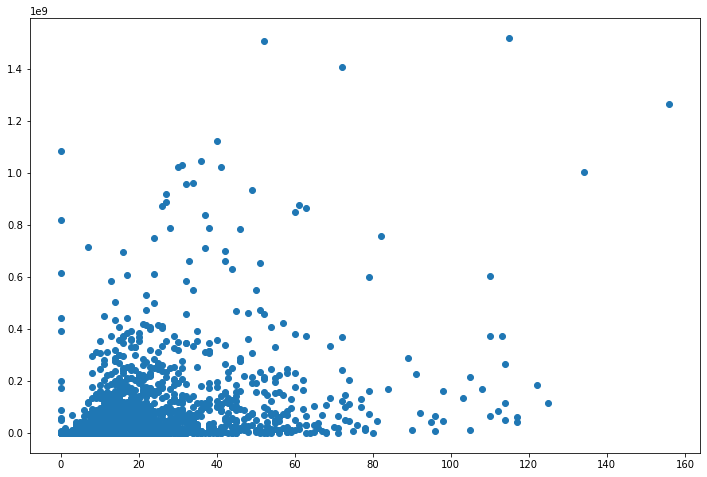

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['castCount'], y_train['revenue'])
plt.show()

In [78]:
list_of_actors = []
for l in x_train['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

print(len(list_of_actors))
unique_actors = set(list_of_actors)
print(len(unique_actors))
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)

49560
32697


[('Samuel L. Jackson', 25),
 ('Morgan Freeman', 24),
 ('Liam Neeson', 23),
 ('J.K. Simmons', 22),
 ('Robert De Niro', 22),
 ('Bruce Willis', 21),
 ('Bill Murray', 20),
 ('Forest Whitaker', 20),
 ('Willem Dafoe', 20),
 ('Jason Statham', 19),
 ('John Turturro', 19),
 ('Bruce McGill', 19),
 ('Susan Sarandon', 19),
 ('Ed Harris', 19),
 ('Robert Duvall', 18),
 ('Sylvester Stallone', 18),
 ('Denzel Washington', 17),
 ('Philip Seymour Hoffman', 17),
 ('Kevin Bacon', 17),
 ('Steve Buscemi', 17),
 ('Christopher Plummer', 17),
 ('Nicolas Cage', 16),
 ('Allison Janney', 16),
 ('Michael Caine', 16),
 ('Richard Jenkins', 16),
 ('John Goodman', 16),
 ('George Clooney', 16),
 ('Christopher Walken', 16),
 ('Dennis Quaid', 16),
 ('Mark Wahlberg', 15),
 ('Gene Hackman', 15),
 ('James Franco', 15),
 ('Ethan Hawke', 15),
 ('Brian Cox', 15),
 ('Jim Broadbent', 15),
 ('Christian Bale', 15),
 ('Matt Damon', 15),
 ('Colin Farrell', 15),
 ('Alec Baldwin', 15),
 ('Mel Gibson', 15),
 ('Ray Liotta', 15),
 ('Keith

In [79]:
x_train['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in x_train['list_of_cast']], index =x_train.index)
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount,countTop100Actors
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,...",14,2
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,...",17,1
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ...",51,1
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso...",12,2
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q...",34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi...",5,0
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",20,0
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki...",14,0


In [80]:
set(x_train['list_of_cast'].iloc[2]) & set(top_100_actors)

{'Nicolas Cage'}

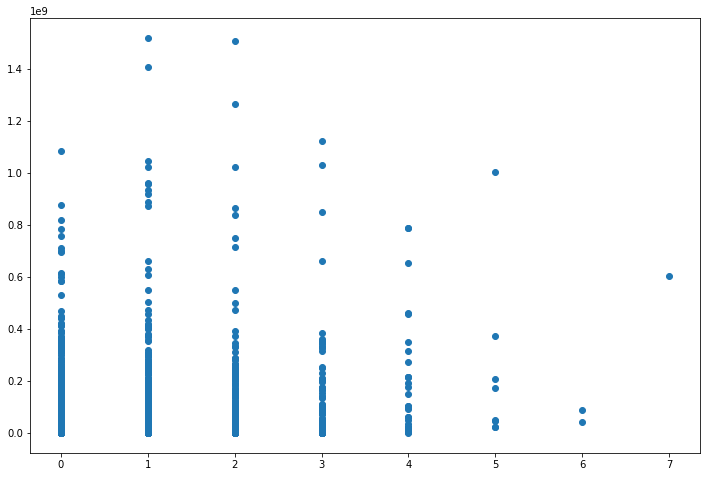

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['countTop100Actors'], y_train['revenue'])
plt.show()

In [82]:
#checked_actors = []
#for i, l in enumerate(train['list_of_cast']):
 #   for act in l:
  #      colName = 'is'+act
   #     if(act in top_100_actors and act not in checked_actors):
    #        checked_actors.append(act)
     #       train[colName] = pd.Series([1 if act in x else 0 for x in train['list_of_cast']], index =list(range(1,3001)))
#train

In [83]:
#for act in top_100_actors:
 #   col = 'is' + act
  #  print(col)
   # plt.figure(figsize=(3,3))
    #plt.scatter(col, "logRevenue", data=train)
    #plt.show()

In [84]:
dataset['list_of_cast'] = dataset['cast'].apply(lambda x: [act['name'] for act in x])
dataset['castCount'] = dataset['list_of_cast'].apply(lambda x: len(x))
list_of_actors = []
for l in dataset['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

unique_actors = set(list_of_actors)
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)
dataset['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in dataset['list_of_cast']], index =dataset.index)

In [85]:
dataset = dataset.drop(['cast'], axis=1)
dataset = dataset.drop(['list_of_cast'], axis=1)

CREW

In [86]:
x_train['list_of_crew'] = x_train['crew'].apply(lambda x: [act['name'] for act in x])


In [87]:
x_train['crew_count'] = x_train['list_of_crew'].apply(lambda x: len(x))

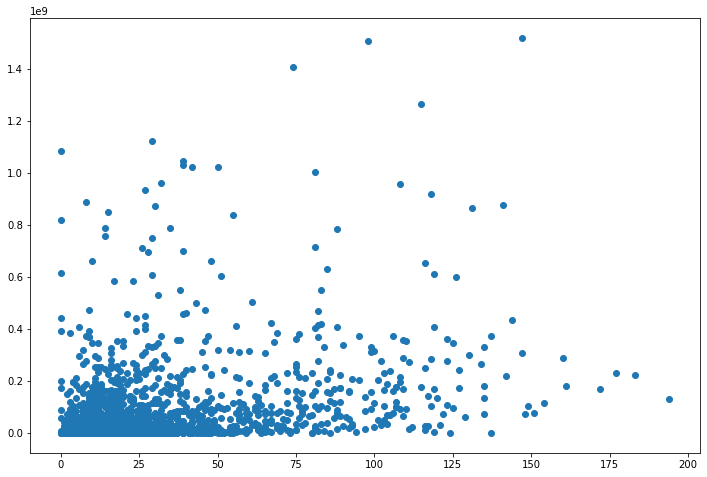

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['crew_count'], y_train['revenue'])
plt.show()

In [89]:
dataset['list_of_crew'] = dataset['crew'].apply(lambda x: [act['name'] for act in x])
dataset['crew_count'] = dataset['list_of_crew'].apply(lambda x: len(x))
dataset = dataset.drop(['list_of_crew'], axis=1)
dataset = dataset.drop(['crew'], axis=1)

In [90]:
dataset['Revenue'] = dataset['revenue']
dataset['LogRevenue'] = dataset['logRevenue']
dataset = dataset.drop(['revenue'], axis=1)
dataset = dataset.drop(['logRevenue'], axis=1)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   budget                                    3000 non-null   float64
 1   popularity                                3000 non-null   float64
 2   runtime                                   3000 non-null   float64
 3   has_collection                            3000 non-null   int64  
 4   isBudgetDirty                             3000 non-null   int64  
 5   genre_count                               3000 non-null   int64  
 6   hasHomepage                               3000 non-null   int64  
 7   is_english                                3000 non-null   int64  
 8   isParamount Pictures                      3000 non-null   int64  
 9   isUnited Artists                          3000 non-null   int64  
 10  isMetro-Goldwyn-Mayer (MGM)         

Predizioni

Baseline con Regressione lineare

In [92]:
dataset_mat = dataset.astype(float).values
x = dataset_mat[:, :2]
y = dataset_mat[:,35]
pca = PCA(n_components=1)
x = pca.fit_transform(x)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [94]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
model.score(x_test, y_test)

Intercept:  67131902.38890475
Coefficients [slopes]: [2.94098569]

Train Error : 9763078678897512.000
Test Error : 8435797985416258.000


0.47630189457513206

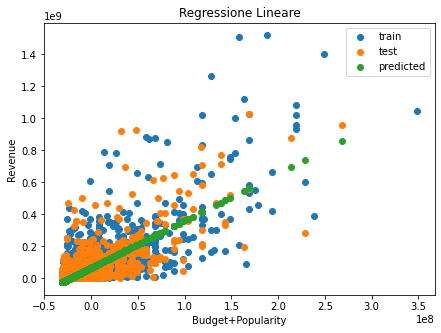

In [95]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_train, y_train, label='train')
ax.scatter(x_test, y_test, label='test')
ax.scatter(x_test, y_pred_test, label='predicted')
ax.set_title("Regressione Lineare")
ax.set_xlabel("Budget+Popularity")
ax.set_ylabel("Revenue")
ax.legend()

Modelli Predittivi

KNN

In [105]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

kNN = neighbors.KNeighborsRegressor(n_neighbors=10)
kNN.fit(x_train,y_train)

y_pred = kNN.predict(x_test)

# compute Accuracy
print ("Accuracy")
train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(train_acc)
print(test_acc)
print (kNN.score(x_test, y_test))

Accuracy
7363277233768258.0
8076215645518749.0
0.49862492678549564


In [107]:
scaler = MinMaxScaler()
scaler.fit(x_train)

kNN = neighbors.KNeighborsRegressor(n_neighbors=10)
kNN.fit(scaler.transform(x_train),y_train)

y_pred = kNN.predict(scaler.transform(x_test))

# compute Accuracy
print ("Accuracy")
train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(scaler.transform(x_train)))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(scaler.transform(x_test)))
print(train_acc)
print(test_acc)
print (kNN.score(scaler.transform(x_test), y_test))

Accuracy
8501695470257469.0
7854216261484983.0
0.5124067476665742


[6783450318041946.0, 12]
[0.6219119993427711, 12]
8053835092763141.0


0.5211721191731791

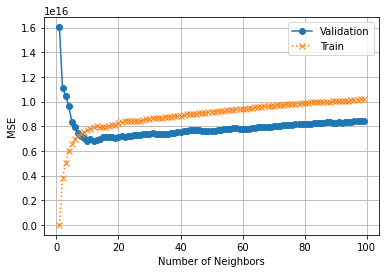

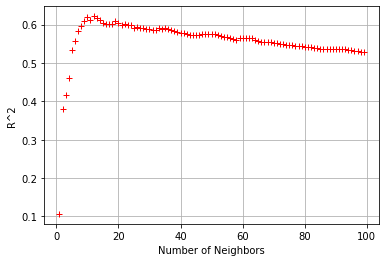

In [115]:
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)
    kNN.fit(x_train,y_train)

    y_pred = kNN.predict(x_valid)

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=kNN.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([kNN.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(R_square[:,1], R_square[:,0], "r+", label="R^2")
ax.set_ylabel("R^2")
ax.set_xlabel("Number of Neighbors")
ax.grid()

kNN = neighbors.KNeighborsRegressor(n_neighbors=12)
kNN.fit(x_train_80,y_train_80)
y_pred = kNN.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(test_acc)
kNN.score(x_test, y_test)

In [100]:
x = dataset_mat[:,[0,1,2]] #budget e popularity
y = dataset_mat[:,3] #revenue
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(x_train,y_train)
train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(train_acc)
print(test_acc)
print(dt.score(x_test, y_test))

0.1404723043865244
0.14982168737452894
0.06361445390919429
